# Rayon Myrie
# CS 636 
# Final Project
# 

# Import Dataset

In [309]:
#install.packages("missMDA")
#install.packages("Amelia")
#install.packages("mice")
#install.packages("missForest")
#install.packages("FactoMineR")
#install.packages("heatmaply")
#install.packages("naniar")
#install.packages("corrplot")
#install.packages("xgboost")
#install.packages("mlbench")
#install.packages("VIM")
#install.packages("rcompanion")


ERROR: Error in install.packages(corr): object 'corr' not found


In [65]:
#libraries
library(heatmaply)
library(ggplot2)
library(dplyr)
library(stringr)
library(tidyr)
library(corrplot)
library(xgboost)
library(caTools)
library(mlbench)
library(scales)
library(naniar)
library(VIM)
library(missMDA)
library(Amelia)
library(missForest)
library(FactoMineR)

In [66]:
#Import Datasets

dataset = read.csv('train.csv')
test = read.csv('test.csv')

head(dataset)
head(test)

Id MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape LandContour
1 1  60         RL       65           8450   Pave   NA    Reg      Lvl        
2 2  20         RL       80           9600   Pave   NA    Reg      Lvl        
3 3  60         RL       68          11250   Pave   NA    IR1      Lvl        
4 4  70         RL       60           9550   Pave   NA    IR1      Lvl        
5 5  60         RL       84          14260   Pave   NA    IR1      Lvl        
6 6  50         RL       85          14115   Pave   NA    IR1      Lvl        
  Utilities ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold YrSold
1 AllPub    ... 0        NA     NA    NA            0      2     2008  
2 AllPub    ... 0        NA     NA    NA            0      5     2007  
3 AllPub    ... 0        NA     NA    NA            0      9     2008  
4 AllPub    ... 0        NA     NA    NA            0      2     2006  
5 AllPub    ... 0        NA     NA    NA            0     12     2008  
6 AllPub    ... 0        NA     MnPrv Shed        700     10     2009  
  SaleType SaleCondition SalePrice
1 WD       Normal        208500   
2 WD       Normal        181500   
3 WD       Normal        223500   
4 WD       Abnorml       140000   
5 WD       Normal        250000   
6 WD       Normal        143000

Id   MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape
1 1461  20        RH       80          11622   Pave   NA    Reg     
2 1462  20        RL       81          14267   Pave   NA    IR1     
3 1463  60        RL       74          13830   Pave   NA    IR1     
4 1464  60        RL       78           9978   Pave   NA    IR1     
5 1465 120        RL       43           5005   Pave   NA    IR1     
6 1466  60        RL       75          10000   Pave   NA    IR1     
  LandContour Utilities ... ScreenPorch PoolArea PoolQC Fence MiscFeature
1 Lvl         AllPub    ... 120         0        NA     MnPrv NA         
2 Lvl         AllPub    ...   0         0        NA     NA    Gar2       
3 Lvl         AllPub    ...   0         0        NA     MnPrv NA         
4 Lvl         AllPub    ...   0         0        NA     NA    NA         
5 HLS         AllPub    ... 144         0        NA     NA    NA         
6 Lvl         AllPub    ...   0         0        NA     NA    NA         
  MiscVal MoSold YrSold SaleType SaleCondition
1     0   6      2010   WD       Normal       
2 12500   6      2010   WD       Normal       
3     0   3      2010   WD       Normal       
4     0   6      2010   WD       Normal       
5     0   1      2010   WD       Normal       
6     0   4      2010   WD       Normal

## Data Understanding

Before doing any modeling of the data.  I needed to understand the data and structure of the dataset.  Doing this gave me a better business understanding of of the data and an idea of how much preprocessing steps I will need to perform and the type of model I can perform.  I used the CRISP-DM Data Mining process.
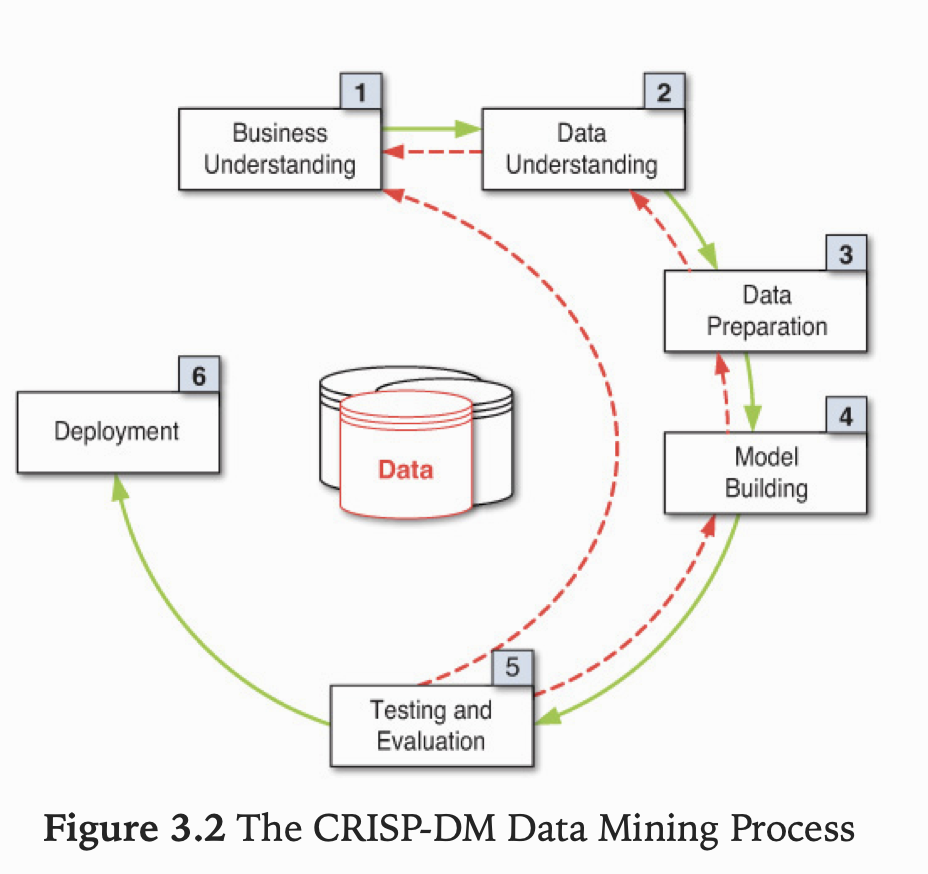

#### Step 1
To get an idea of the rows/columns and structure of the dataset.  I wanted to make sure I could repeat the same steps perform on the training set on the testing set.

Running the scripts below I could see that both datasets match.  Except the testing set its missing a column I will need to predict.  I could also get an idea of the type of values in the dataset, the valid values and if there are any missing values.  From here I can move on to step 2 of my data discovery.

In [67]:
#Get an idea of the number of columns and rows in each dataset
#check training dataset
Trcols=ncol(dataset)
Trrows=nrow(dataset)
Tscols=ncol(test)
Tsrows=nrow(test)
sprintf("%s Columns in training dataset",Trcols)
sprintf('%s rows in training datase', Trrows)
sprintf("%s Columns in testing dataset",Tscols)
sprintf('%s rows in testing datase', Tsrows)
#
print('structure of Training dataset')
str(dataset)

print('structure of test dataset')
str(test)


[1] "81 Columns in training dataset"

[1] "1460 rows in training datase"

[1] "80 Columns in testing dataset"

[1] "1459 rows in testing datase"

[1] "structure of Training dataset"
'data.frame':	1460 obs. of  81 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : Factor w/ 5 levels "C (all)","FV",..: 4 4 4 4 4 4 4 4 5 4 ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley        : Factor w/ 2 levels "Grvl","Pave": NA NA NA NA NA NA NA NA NA NA ...
 $ LotShape     : Factor w/ 4 levels "IR1","IR2","IR3",..: 4 4 1 1 1 1 4 1 4 4 ...
 $ LandContour  : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Utilities    : Factor w/ 2 levels "AllPub","NoSeWa": 1 1 1 1 1 1 1 1 1 1 ...
 $ LotConfig    : Factor w/ 5 levels "Corner","CulDSac",..: 5 3 5 1 3 5 5 1 5 1 ...
 $ LandSlope    : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood : Factor 

#### Missing values
Find summary of fields with missing values

In [68]:

TRmissing=colSums(sapply(dataset,is.na))

TRmissing_summary=(TRmissing[TRmissing>0])
TRmissing_summary

Tsmissing=colSums(sapply(test,is.na))

Tsmissing_summary=(Tsmissing[Tsmissing>0])
Tsmissing_summary

LotFrontage        Alley   MasVnrType   MasVnrArea     BsmtQual     BsmtCond 
         259         1369            8            8           37           37 
BsmtExposure BsmtFinType1 BsmtFinType2   Electrical  FireplaceQu   GarageType 
          38           37           38            1          690           81 
 GarageYrBlt GarageFinish   GarageQual   GarageCond       PoolQC        Fence 
          81           81           81           81         1453         1179 
 MiscFeature 
        1406

MSZoning  LotFrontage        Alley    Utilities  Exterior1st  Exterior2nd 
           4          227         1352            2            1            1 
  MasVnrType   MasVnrArea     BsmtQual     BsmtCond BsmtExposure BsmtFinType1 
          16           15           44           45           44           42 
  BsmtFinSF1 BsmtFinType2   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF BsmtFullBath 
           1           42            1            1            1            2 
BsmtHalfBath  KitchenQual   Functional  FireplaceQu   GarageType  GarageYrBlt 
           2            1            2          730           76           78 
GarageFinish   GarageCars   GarageArea   GarageQual   GarageCond       PoolQC 
          78            1            1           78           78         1456 
       Fence  MiscFeature     SaleType 
        1169         1408            1

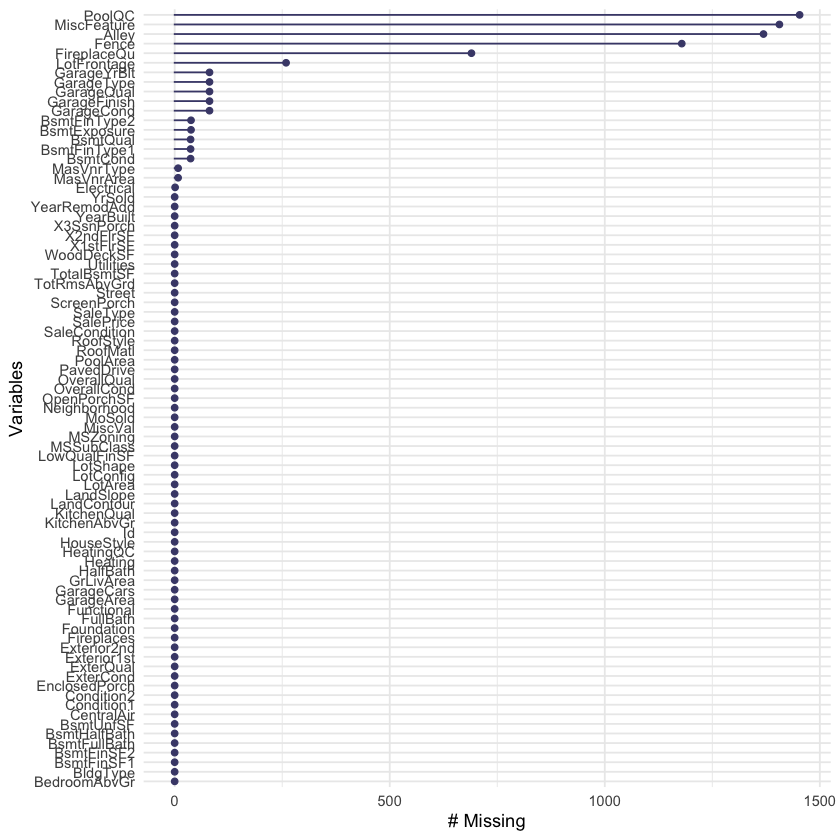

In [69]:
gg_miss_var(dataset)
library(VIM)



 Variables sorted by number of missings: 
      Variable        Count
        PoolQC 0.9952054795
   MiscFeature 0.9630136986
         Alley 0.9376712329
         Fence 0.8075342466
   FireplaceQu 0.4726027397
   LotFrontage 0.1773972603
    GarageType 0.0554794521
   GarageYrBlt 0.0554794521
  GarageFinish 0.0554794521
    GarageQual 0.0554794521
    GarageCond 0.0554794521
  BsmtExposure 0.0260273973
  BsmtFinType2 0.0260273973
      BsmtQual 0.0253424658
      BsmtCond 0.0253424658
  BsmtFinType1 0.0253424658
    MasVnrType 0.0054794521
    MasVnrArea 0.0054794521
    Electrical 0.0006849315
            Id 0.0000000000
    MSSubClass 0.0000000000
      MSZoning 0.0000000000
       LotArea 0.0000000000
        Street 0.0000000000
      LotShape 0.0000000000
   LandContour 0.0000000000
     Utilities 0.0000000000
     LotConfig 0.0000000000
     LandSlope 0.0000000000
  Neighborhood 0.0000000000
    Condition1 0.0000000000
    Condition2 0.0000000000
      BldgType 0.0000000000
    H

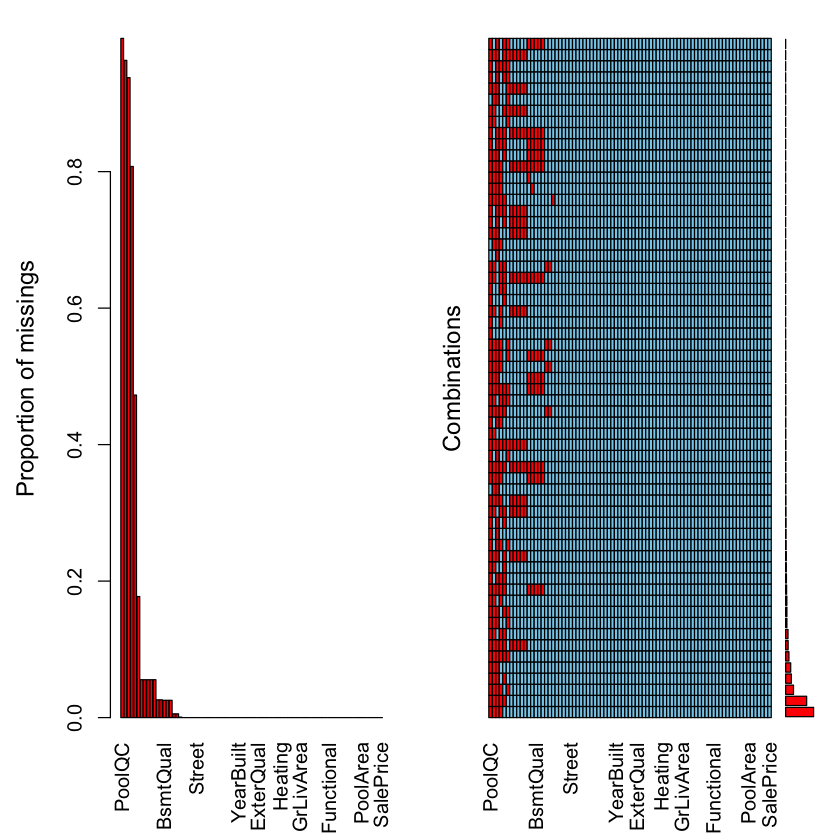

In [70]:
#Get an Idea of of each combination with missig values
sat_missing=summary(aggr(dataset, sortVar=TRUE))$combinations

In [71]:
head(sat_missing[rev(order(sat_missing[,2])),])

Combinations                                                                                                                                                     
19 0:0:0:0:0:0:1:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:1:1:1:0:0:0:0:0:0
25 0:0:0:0:0:0:1:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:1:0:0:0:0:0:0:0:0:0:0:0:0:0:0:1:1:1:0:0:0:0:0:0
50 0:0:0:1:0:0:1:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:1:1:1:0:0:0:0:0:0
23 0:0:0:0:0:0:1:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:1:0:0:0:0:0:0:0:0:0:0:0:0:0:0:1:0:1:0:0:0:0:0:0
17 0:0:0:0:0:0:1:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:1:0:1:0:0:0:0:0:0
55 0:0:0:1:0:0:1:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:0:1:0:0:0:0:0:0:0:0:0:0:0:0:0:0:1:1:1:0:0:0:0:0:0
   Count Percent  
19 459   31.438356
25 345   23.630137
50 129    8.835616
23  94    6.438356
17  83    5.684932
55  54    3.698630

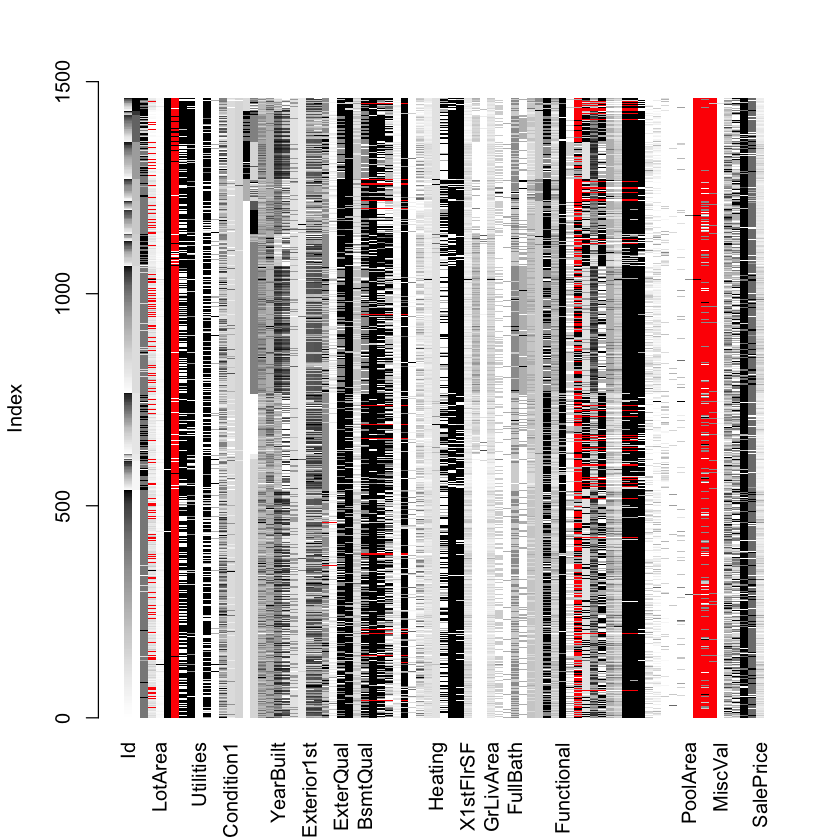

In [72]:
matrixplot(dataset, sortby = 2)

Based on the data, I will need to find a way to handle missing data in both files.  I didnt want to remove rows with missing data because the dataset are not that that large.

I also noticed that some fields that had missing data in test did not have missing data in the Training dataset.  I need to find a way to check each field for missing data and decide how to handle it in the Pre-Processing phase.

For Example:
1). LotFrontage the dataset has 259 NA values, while the values here are numeric.  The best way to handle this is to find the Mean of all the values and replace the NA's with the mean. For Training, Validating and test datasets.
    I will do the same for MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Functional,GarageCars,GarageArea

2). MSZoning the test dataset had 4 NA and it is categorical data, so I am going to replace it with the most frequent values and then factorize in the preprocessing stage.
    I will do the same forElectrical, Utilities, Exterior1st, Exterior2nd, BsmtFullBath, BsmtHalfBath, KitchenQual, Functional, SaleType

3). Alley, MasVnrType,BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1,BsmtFinType2, FireplaceQu,GarageType, GarageFinish, GarageQual,GarageCond,PoolQC,Fence it is ok to have a NA value. But I am going to replace it with "XX" for non-existing So we can include this field when we factorize the dataset and test set

4) GarageYrBlt will have YearBuilt when it has NA.

    
Note: its ok to have FireplaceQu NA, since the FirePlace=0 basically implys that FireplaceQu is non-existing.

After reviewing the data, I didnt think it was necessary to run prediction models like mice and amelia.  Standard Mean/mode/Median Imputation will clean the data for modeling along with field comparisions and updates, 

In [73]:
##MiscFeature
count(dataset%>%select(MiscFeature, GarageCars,GarageType)%>%
filter(is.na(MiscFeature) & GarageCars==0) )

count(dataset%>%select(MiscFeature, GarageCars,GarageType)%>%
filter(is.na(MiscFeature) & GarageCars==1) )

count(dataset%>%select(MiscFeature, GarageCars,GarageType)%>%
filter(is.na(MiscFeature) & GarageCars>=2) )

n 
1 78

n  
1 349

n  
1 979

In [74]:
## GarageYrBlt idea of missing data
count(dataset%>%select(GarageYrBlt,GarageType)%>%
filter((is.na(GarageYrBlt) & is.na(GarageType))))

count(dataset%>%select(GarageYrBlt,GarageType)%>%
filter((is.na(GarageYrBlt) & !is.na(GarageType))))



n 
1 81

n
1 0

##### Other Data Trends noticed to create new Features: If time permits
       1). Remodeled:  
            if YearBuilt<>YearRemodAdd set remodeled indicator to Y
            if YearBuilt=YearRemodAdd set remodeled indicator to N
       2) 2_BuildingMat:
            if Exterior1st<>Exterior2nd set indicator to Y
            if Exterior1st=Exterior2nd set indicator to N
#### other preprocessing to try :If time permits
        MiscFeature I can use GarageCars to populate some of the NA rows.      if GarageCars >= 2 set NA to Gar2
     if GarageCars = 1 set NA to Gar1(valid value)
     if GarageCars = 0 set as XX for not existent
    Then factorize 

#### Step2 
check for Quantitative and Qualitative Data.
I need to figure out how to handle continous variables and categorical data.  Then move on to the Data Preprocessing to remove the noise.

In [75]:
print(names(dataset)[which(sapply(dataset, is.character))])
print(names(dataset)[which(sapply(dataset, is.numeric))])


character(0)
 [1] "Id"            "MSSubClass"    "LotFrontage"   "LotArea"      
 [5] "OverallQual"   "OverallCond"   "YearBuilt"     "YearRemodAdd" 
 [9] "MasVnrArea"    "BsmtFinSF1"    "BsmtFinSF2"    "BsmtUnfSF"    
[13] "TotalBsmtSF"   "X1stFlrSF"     "X2ndFlrSF"     "LowQualFinSF" 
[17] "GrLivArea"     "BsmtFullBath"  "BsmtHalfBath"  "FullBath"     
[21] "HalfBath"      "BedroomAbvGr"  "KitchenAbvGr"  "TotRmsAbvGrd" 
[25] "Fireplaces"    "GarageYrBlt"   "GarageCars"    "GarageArea"   
[29] "WoodDeckSF"    "OpenPorchSF"   "EnclosedPorch" "X3SsnPorch"   
[33] "ScreenPorch"   "PoolArea"      "MiscVal"       "MoSold"       
[37] "YrSold"        "SalePrice"    


#### Analyzing the Sale Price and getting data summary 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34900  129975  163000  180921  214000  755000 


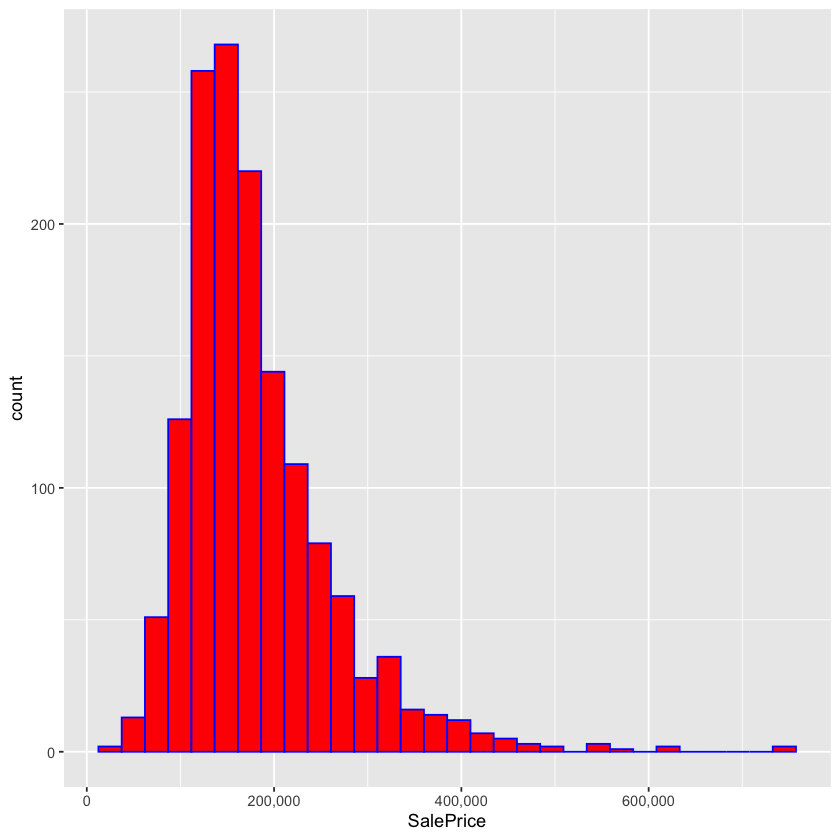

In [76]:
sp_sum=summary(dataset$SalePrice)
print(sp_sum)
ggplot(dataset,aes(SalePrice))+geom_histogram(fill="red", color="blue", bins=30)+scale_x_continuous(labels = scales::comma)

NULL

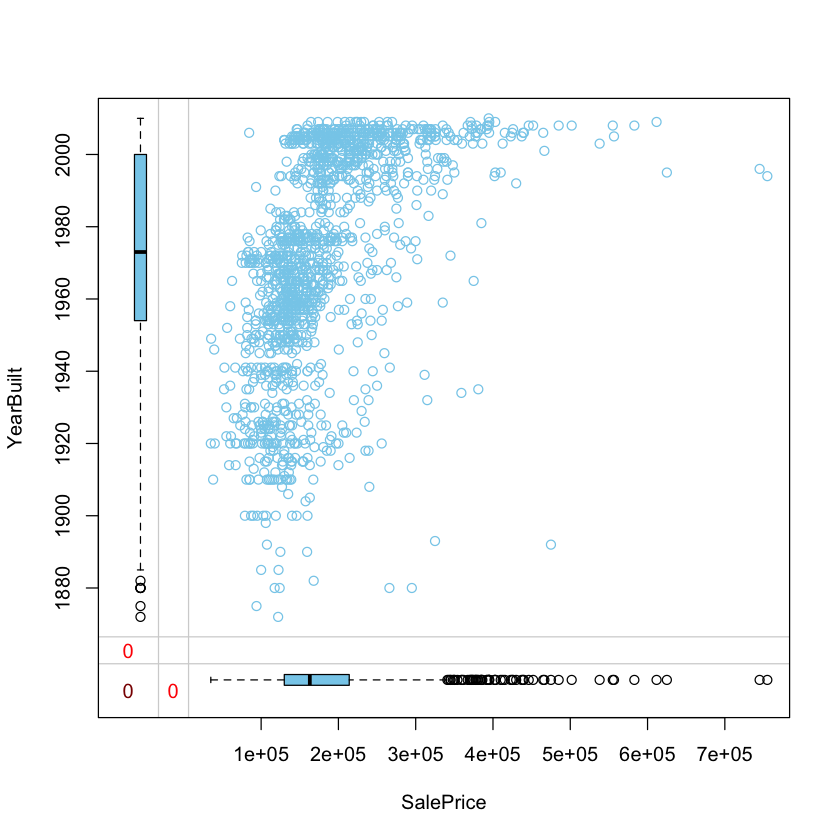

NULL

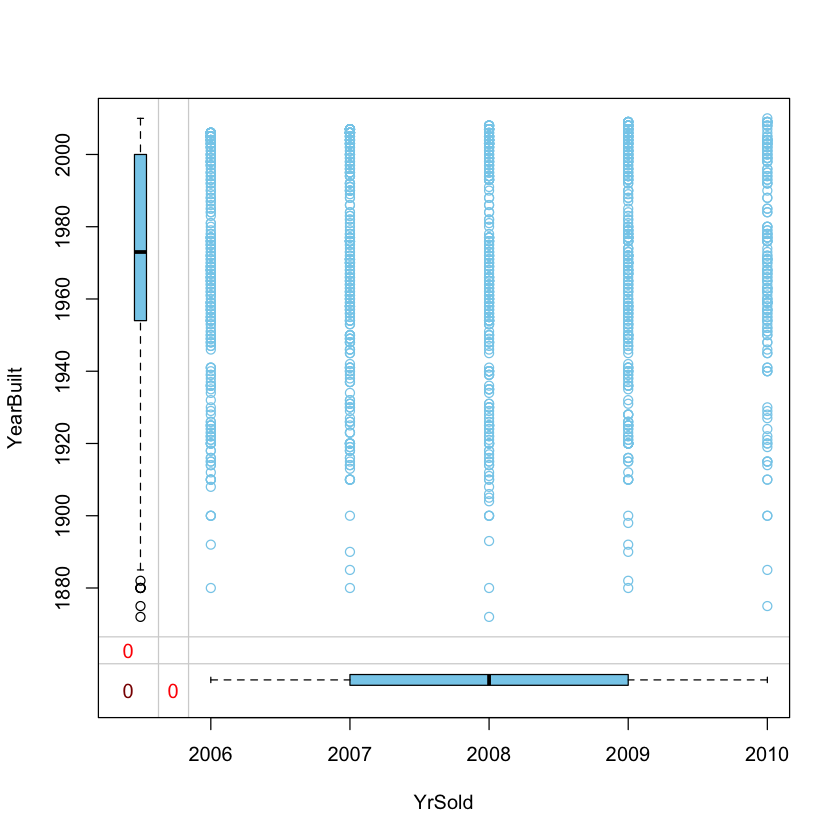

In [77]:
marginplot(dataset[,c("SalePrice","YearBuilt")])+scale_x_continuous(labels = scales::comma)
marginplot(dataset[,c("YrSold","YearBuilt")])+scale_x_continuous(labels = scales::comma)

In [78]:
#shows a summary of each feature, this will be usefuly when
# I replace missing values w with the mean and mode
summary(dataset)

summary(test)

       Id           MSSubClass       MSZoning     LotFrontage    
 Min.   :   1.0   Min.   : 20.0   C (all):  10   Min.   : 21.00  
 1st Qu.: 365.8   1st Qu.: 20.0   FV     :  65   1st Qu.: 59.00  
 Median : 730.5   Median : 50.0   RH     :  16   Median : 69.00  
 Mean   : 730.5   Mean   : 56.9   RL     :1151   Mean   : 70.05  
 3rd Qu.:1095.2   3rd Qu.: 70.0   RM     : 218   3rd Qu.: 80.00  
 Max.   :1460.0   Max.   :190.0                  Max.   :313.00  
                                                 NA's   :259     
    LotArea        Street      Alley      LotShape  LandContour  Utilities   
 Min.   :  1300   Grvl:   6   Grvl:  50   IR1:484   Bnk:  63    AllPub:1459  
 1st Qu.:  7554   Pave:1454   Pave:  41   IR2: 41   HLS:  50    NoSeWa:   1  
 Median :  9478               NA's:1369   IR3: 10   Low:  36                 
 Mean   : 10517                           Reg:925   Lvl:1311                 
 3rd Qu.: 11602                                                              
 Max

       Id         MSSubClass        MSZoning     LotFrontage    
 Min.   :1461   Min.   : 20.00   C (all):  15   Min.   : 21.00  
 1st Qu.:1826   1st Qu.: 20.00   FV     :  74   1st Qu.: 58.00  
 Median :2190   Median : 50.00   RH     :  10   Median : 67.00  
 Mean   :2190   Mean   : 57.38   RL     :1114   Mean   : 68.58  
 3rd Qu.:2554   3rd Qu.: 70.00   RM     : 242   3rd Qu.: 80.00  
 Max.   :2919   Max.   :190.00   NA's   :   4   Max.   :200.00  
                                                NA's   :227     
    LotArea       Street      Alley      LotShape  LandContour  Utilities   
 Min.   : 1470   Grvl:   6   Grvl:  70   IR1:484   Bnk:  54    AllPub:1457  
 1st Qu.: 7391   Pave:1453   Pave:  37   IR2: 35   HLS:  70    NA's  :   2  
 Median : 9399               NA's:1352   IR3:  6   Low:  24                 
 Mean   : 9819                           Reg:934   Lvl:1311                 
 3rd Qu.:11518                                                              
 Max.   :56600    

## Data Preparation 

### Split Dataset into Training and Validation
 I need to apply the mean function after splitting the file in 2, since the mean will change once the file is split.
 
 After that I need to apply the functions above to all 3 datasets
     1) dataset split in 2 ( train and validate)
     2) test
     

In [79]:
## Split dataset into 2

set.seed(123)
split = sample.split(dataset$SalePrice, SplitRatio = 0.8)
training_set = subset(dataset, split == TRUE)
validate_set = subset(dataset, split == FALSE)

nrow(validate_set)
nrow(training_set)
ncol(validate_set)
ncol(training_set)
head(validate_set)
head(training_set)

training_set%>%select(Electrical)


[1] 202

[1] 1258

[1] 81

[1] 81

Id MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape LandContour
4   4  70        RL       60           9550   Pave   NA    IR1      Lvl        
13 13  20        RL       NA          12968   Pave   NA    IR2      Lvl        
24 24 120        RM       44           4224   Pave   NA    Reg      Lvl        
29 29  20        RL       47          16321   Pave   NA    IR1      Lvl        
33 33  20        RL       85          11049   Pave   NA    Reg      Lvl        
34 34  20        RL       70          10552   Pave   NA    IR1      Lvl        
   Utilities ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold YrSold
4  AllPub    ... 0        NA     NA    NA          0        2     2006  
13 AllPub    ... 0        NA     NA    NA          0        9     2008  
24 AllPub    ... 0        NA     NA    NA          0        6     2007  
29 AllPub    ... 0        NA     NA    NA          0       12     2006  
33 AllPub    ... 0        NA     NA    NA          0        1     2008  
34 AllPub    ... 0        NA     NA    NA          0        4     2010  
   SaleType SaleCondition SalePrice
4  WD       Abnorml       140000   
13 WD       Normal        144000   
24 WD       Normal        129900   
29 WD       Normal        207500   
33 WD       Normal        179900   
34 WD       Normal        165500

Id MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape LandContour
1 1  60         RL       65           8450   Pave   NA    Reg      Lvl        
2 2  20         RL       80           9600   Pave   NA    Reg      Lvl        
3 3  60         RL       68          11250   Pave   NA    IR1      Lvl        
5 5  60         RL       84          14260   Pave   NA    IR1      Lvl        
6 6  50         RL       85          14115   Pave   NA    IR1      Lvl        
7 7  20         RL       75          10084   Pave   NA    Reg      Lvl        
  Utilities ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold YrSold
1 AllPub    ... 0        NA     NA    NA            0      2     2008  
2 AllPub    ... 0        NA     NA    NA            0      5     2007  
3 AllPub    ... 0        NA     NA    NA            0      9     2008  
5 AllPub    ... 0        NA     NA    NA            0     12     2008  
6 AllPub    ... 0        NA     MnPrv Shed        700     10     2009  
7 AllPub    ... 0        NA     NA    NA            0      8     2007  
  SaleType SaleCondition SalePrice
1 WD       Normal        208500   
2 WD       Normal        181500   
3 WD       Normal        223500   
5 WD       Normal        250000   
6 WD       Normal        143000   
7 WD       Normal        307000

Electrical
1    SBrkr     
2    SBrkr     
3    SBrkr     
5    SBrkr     
6    SBrkr     
7    SBrkr     
8    SBrkr     
9    FuseF     
10   SBrkr     
11   SBrkr     
12   SBrkr     
14   SBrkr     
15   SBrkr     
16   FuseA     
17   SBrkr     
18   SBrkr     
19   SBrkr     
20   SBrkr     
21   SBrkr     
22   FuseF     
23   SBrkr     
25   SBrkr     
26   SBrkr     
27   SBrkr     
28   SBrkr     
30   SBrkr     
31   SBrkr     
32   SBrkr     
35   SBrkr     
36   SBrkr     
...  ...       
1427 SBrkr     
1429 SBrkr     
1430 SBrkr     
1431 SBrkr     
1432 SBrkr     
1433 SBrkr     
1434 SBrkr     
1435 SBrkr     
1436 SBrkr     
1438 SBrkr     
1439 FuseA     
1440 SBrkr     
1441 SBrkr     
1442 SBrkr     
1443 SBrkr     
1444 FuseF     
1445 SBrkr     
1446 SBrkr     
1447 SBrkr     
1448 SBrkr     
1449 SBrkr     
1450 SBrkr     
1451 SBrkr     
1452 SBrkr     
1455 SBrkr     
1456 SBrkr     
1457 SBrkr     
1458 SBrkr     
1459 FuseA     
1460 SBrkr

#### Pre-processing Functions
#### Missing value Functions:
######  1) Missing Numerical Data
        Calcuate the mean and update missing values with mean to the
        following Features:
            LotFrontage, MasVnrArea, BsmtFinSF1, BsmtFinSF2,
            BsmtUnfSF, TotalBsmtSF, Functional,GarageCars,GarageArea


In [80]:
##training update
training_set$LotFrontage = ifelse(is.na(training_set$LotFrontage),
                     ave(training_set$LotFrontage, FUN = function(x) mean(x, na.rm = TRUE)),
                     training_set$LotFrontage)
                                  
training_set$MasVnrArea = ifelse(is.na(training_set$MasVnrArea),
                     ave(training_set$MasVnrArea, FUN = function(x) mean(x, na.rm = TRUE)),
                     training_set$MasVnrArea)                          
 
training_set$BsmtFinSF1 = ifelse(is.na(training_set$BsmtFinSF1),
                     ave(training_set$BsmtFinSF1, FUN = function(x) mean(x, na.rm = TRUE)),
                     training_set$BsmtFinSF1)
                                 
training_set$BsmtFinSF2 = ifelse(is.na(training_set$BsmtFinSF2),
                     ave(training_set$BsmtFinSF2, FUN = function(x) mean(x, na.rm = TRUE)),
                     training_set$BsmtFinSF2)                                 
                                 
training_set$BsmtUnfSF = ifelse(is.na(training_set$BsmtUnfSF),
                     ave(training_set$BsmtUnfSF, FUN = function(x) mean(x, na.rm = TRUE)),
                     training_set$BsmtUnfSF)                                 
                                                                  
training_set$TotalBsmtSF = ifelse(is.na(training_set$TotalBsmtSF),
                     ave(training_set$TotalBsmtSF, FUN = function(x) mean(x, na.rm = TRUE)),
                     training_set$TotalBsmtSF)    
                                  
training_set$Functional = ifelse(is.na(training_set$Functional),
                     ave(training_set$Functional, FUN = function(x) mean(x, na.rm = TRUE)),
                     training_set$Functional)   
training_set$GarageCars = ifelse(is.na(training_set$GarageCars),
                     ave(training_set$GarageCars, FUN = function(x) mean(x, na.rm = TRUE)),
                     training_set$GarageCars)    
                                 
training_set$GarageArea = ifelse(is.na(training_set$GarageArea),
                     ave(training_set$GarageArea, FUN = function(x) mean(x, na.rm = TRUE)),
                     training_set$GarageArea)                                  
                                                                  
Tr=colSums(sapply(training_set,is.na))

Tr[Tr>0]                               
head(training_set,10)                          
                                 
training_set%>%select(Electrical)
               

Alley   MasVnrType     BsmtQual     BsmtCond BsmtExposure BsmtFinType1 
        1188            8           30           30           31           30 
BsmtFinType2  FireplaceQu   GarageType  GarageYrBlt GarageFinish   GarageQual 
          31          583           68           68           68           68 
  GarageCond       PoolQC        Fence  MiscFeature 
          68         1252         1017         1212

Id MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape LandContour
1   1  60        RL       65.00000     8450   Pave   NA    Reg      Lvl        
2   2  20        RL       80.00000     9600   Pave   NA    Reg      Lvl        
3   3  60        RL       68.00000    11250   Pave   NA    IR1      Lvl        
5   5  60        RL       84.00000    14260   Pave   NA    IR1      Lvl        
6   6  50        RL       85.00000    14115   Pave   NA    IR1      Lvl        
7   7  20        RL       75.00000    10084   Pave   NA    Reg      Lvl        
8   8  60        RL       70.41659    10382   Pave   NA    IR1      Lvl        
9   9  50        RM       51.00000     6120   Pave   NA    Reg      Lvl        
10 10 190        RL       50.00000     7420   Pave   NA    Reg      Lvl        
11 11  20        RL       70.00000    11200   Pave   NA    Reg      Lvl        
   Utilities ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold YrSold
1  AllPub    ... 0        NA     NA    NA            0      2     2008  
2  AllPub    ... 0        NA     NA    NA            0      5     2007  
3  AllPub    ... 0        NA     NA    NA            0      9     2008  
5  AllPub    ... 0        NA     NA    NA            0     12     2008  
6  AllPub    ... 0        NA     MnPrv Shed        700     10     2009  
7  AllPub    ... 0        NA     NA    NA            0      8     2007  
8  AllPub    ... 0        NA     NA    Shed        350     11     2009  
9  AllPub    ... 0        NA     NA    NA            0      4     2008  
10 AllPub    ... 0        NA     NA    NA            0      1     2008  
11 AllPub    ... 0        NA     NA    NA            0      2     2008  
   SaleType SaleCondition SalePrice
1  WD       Normal        208500   
2  WD       Normal        181500   
3  WD       Normal        223500   
5  WD       Normal        250000   
6  WD       Normal        143000   
7  WD       Normal        307000   
8  WD       Normal        200000   
9  WD       Abnorml       129900   
10 WD       Normal        118000   
11 WD       Normal        129500

Electrical
1    SBrkr     
2    SBrkr     
3    SBrkr     
5    SBrkr     
6    SBrkr     
7    SBrkr     
8    SBrkr     
9    FuseF     
10   SBrkr     
11   SBrkr     
12   SBrkr     
14   SBrkr     
15   SBrkr     
16   FuseA     
17   SBrkr     
18   SBrkr     
19   SBrkr     
20   SBrkr     
21   SBrkr     
22   FuseF     
23   SBrkr     
25   SBrkr     
26   SBrkr     
27   SBrkr     
28   SBrkr     
30   SBrkr     
31   SBrkr     
32   SBrkr     
35   SBrkr     
36   SBrkr     
...  ...       
1427 SBrkr     
1429 SBrkr     
1430 SBrkr     
1431 SBrkr     
1432 SBrkr     
1433 SBrkr     
1434 SBrkr     
1435 SBrkr     
1436 SBrkr     
1438 SBrkr     
1439 FuseA     
1440 SBrkr     
1441 SBrkr     
1442 SBrkr     
1443 SBrkr     
1444 FuseF     
1445 SBrkr     
1446 SBrkr     
1447 SBrkr     
1448 SBrkr     
1449 SBrkr     
1450 SBrkr     
1451 SBrkr     
1452 SBrkr     
1455 SBrkr     
1456 SBrkr     
1457 SBrkr     
1458 SBrkr     
1459 FuseA     
1460 SBrkr

In [81]:
##Validate update
validate_set$LotFrontage = ifelse(is.na(validate_set$LotFrontage),
                     ave(validate_set$LotFrontage, FUN = function(x) mean(x, na.rm = TRUE)),
                     validate_set$LotFrontage)
                                  
validate_set$MasVnrArea = ifelse(is.na(validate_set$MasVnrArea),
                     ave(validate_set$MasVnrArea, FUN = function(x) mean(x, na.rm = TRUE)),
                     validate_set$MasVnrArea)                          
 
validate_set$BsmtFinSF1 = ifelse(is.na(validate_set$BsmtFinSF1),
                     ave(validate_set$BsmtFinSF1, FUN = function(x) mean(x, na.rm = TRUE)),
                     validate_set$BsmtFinSF1)
                                 
validate_set$BsmtFinSF2 = ifelse(is.na(validate_set$BsmtFinSF2),
                     ave(validate_set$BsmtFinSF2, FUN = function(x) mean(x, na.rm = TRUE)),
                     validate_set$BsmtFinSF2)                                 
                                 
validate_set$BsmtUnfSF = ifelse(is.na(validate_set$BsmtUnfSF),
                     ave(validate_set$BsmtUnfSF, FUN = function(x) mean(x, na.rm = TRUE)),
                     validate_set$BsmtUnfSF)                                 
                                                                  
validate_set$TotalBsmtSF = ifelse(is.na(validate_set$TotalBsmtSF),
                     ave(validate_set$TotalBsmtSF, FUN = function(x) mean(x, na.rm = TRUE)),
                     validate_set$TotalBsmtSF)    
                                  
validate_set$Functional = ifelse(is.na(validate_set$Functional),
                     ave(validate_set$Functional, FUN = function(x) mean(x, na.rm = TRUE)),
                     validate_set$Functional)   
validate_set$GarageCars = ifelse(is.na(validate_set$GarageCars),
                     ave(validate_set$GarageCars, FUN = function(x) mean(x, na.rm = TRUE)),
                     validate_set$GarageCars)    
                                 
validate_set$GarageArea = ifelse(is.na(validate_set$GarageArea),
                     ave(validate_set$GarageArea, FUN = function(x) mean(x, na.rm = TRUE)),
                     validate_set$GarageArea)                                  
                                                                  
Vd=colSums(sapply(validate_set,is.na))

Vd[Vd>0]                               
head(validate_set,10)                          

Alley     BsmtQual     BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 
         181            7            7            7            7            7 
  Electrical  FireplaceQu   GarageType  GarageYrBlt GarageFinish   GarageQual 
           1          107           13           13           13           13 
  GarageCond       PoolQC        Fence  MiscFeature 
          13          201          162          194

Id MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape LandContour
4   4  70        RL        60.00000    9550   Pave   NA    IR1      Lvl        
13 13  20        RL        67.73171   12968   Pave   NA    IR2      Lvl        
24 24 120        RM        44.00000    4224   Pave   NA    Reg      Lvl        
29 29  20        RL        47.00000   16321   Pave   NA    IR1      Lvl        
33 33  20        RL        85.00000   11049   Pave   NA    Reg      Lvl        
34 34  20        RL        70.00000   10552   Pave   NA    IR1      Lvl        
37 37  20        RL       112.00000   10859   Pave   NA    Reg      Lvl        
43 43  85        RL        67.73171    9180   Pave   NA    IR1      Lvl        
45 45  20        RL        70.00000    7945   Pave   NA    Reg      Lvl        
67 67  20        RL        67.73171   19900   Pave   NA    Reg      Lvl        
   Utilities ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold YrSold
4  AllPub    ... 0        NA     NA    NA          0        2     2006  
13 AllPub    ... 0        NA     NA    NA          0        9     2008  
24 AllPub    ... 0        NA     NA    NA          0        6     2007  
29 AllPub    ... 0        NA     NA    NA          0       12     2006  
33 AllPub    ... 0        NA     NA    NA          0        1     2008  
34 AllPub    ... 0        NA     NA    NA          0        4     2010  
37 AllPub    ... 0        NA     NA    NA          0        6     2009  
43 AllPub    ... 0        NA     MnPrv NA          0       12     2007  
45 AllPub    ... 0        NA     NA    NA          0        5     2006  
67 AllPub    ... 0        NA     NA    NA          0        7     2010  
   SaleType SaleCondition SalePrice
4  WD       Abnorml       140000   
13 WD       Normal        144000   
24 WD       Normal        129900   
29 WD       Normal        207500   
33 WD       Normal        179900   
34 WD       Normal        165500   
37 WD       Normal        145000   
43 WD       Normal        144000   
45 WD       Normal        141000   
67 WD       Normal        180000

In [82]:
##test update
test_set=test
test_set$LotFrontage = ifelse(is.na(test_set$LotFrontage),
                     ave(test_set$LotFrontage, FUN = function(x) mean(x, na.rm = TRUE)),
                     test_set$LotFrontage)
                                  
test_set$MasVnrArea = ifelse(is.na(test_set$MasVnrArea),
                     ave(test_set$MasVnrArea, FUN = function(x) mean(x, na.rm = TRUE)),
                     test_set$MasVnrArea)                          
 
test_set$BsmtFinSF1 = ifelse(is.na(test_set$BsmtFinSF1),
                     ave(test_set$BsmtFinSF1, FUN = function(x) mean(x, na.rm = TRUE)),
                     test_set$BsmtFinSF1)
                                 
test_set$BsmtFinSF2 = ifelse(is.na(test_set$BsmtFinSF2),
                     ave(test_set$BsmtFinSF2, FUN = function(x) mean(x, na.rm = TRUE)),
                     test_set$BsmtFinSF2)                                 
                                 
test_set$BsmtUnfSF = ifelse(is.na(test_set$BsmtUnfSF),
                     ave(test_set$BsmtUnfSF, FUN = function(x) mean(x, na.rm = TRUE)),
                     test_set$BsmtUnfSF)                                 
                                                                  
test_set$TotalBsmtSF = ifelse(is.na(test_set$TotalBsmtSF),
                     ave(test_set$TotalBsmtSF, FUN = function(x) mean(x, na.rm = TRUE)),
                     test_set$TotalBsmtSF)    
                                  
test_set$Functional = ifelse(is.na(test_set$Functional),
                     ave(test_set$Functional, FUN = function(x) mean(x, na.rm = TRUE)),
                     test_set$Functional)   
test_set$GarageCars = ifelse(is.na(test_set$GarageCars),
                     ave(test_set$GarageCars, FUN = function(x) mean(x, na.rm = TRUE)),
                     test_set$GarageCars)    
                                 
test_set$GarageArea = ifelse(is.na(test_set$GarageArea),
                     ave(test_set$GarageArea, FUN = function(x) mean(x, na.rm = TRUE)),
                     test_set$GarageArea)                                  
                                                                  
Ts=colSums(sapply(test_set,is.na))

Ts[Ts>0]                               
head(test_set,10)    
                             
training_set%>%select(LotFrontage)%>%
            filter(is.na(LotFrontage))

Warning message in mean.default(x, na.rm = TRUE):
“argument is not numeric or logical: returning NA”

MSZoning        Alley    Utilities  Exterior1st  Exterior2nd   MasVnrType 
           4         1352            2            1            1           16 
    BsmtQual     BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 BsmtFullBath 
          44           45           44           42           42            2 
BsmtHalfBath  KitchenQual   Functional  FireplaceQu   GarageType  GarageYrBlt 
           2            1            2          730           76           78 
GarageFinish   GarageQual   GarageCond       PoolQC        Fence  MiscFeature 
          78           78           78         1456         1169         1408 
    SaleType 
           1

Id   MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape
1  1461  20        RH       80.00000    11622   Pave   NA    Reg     
2  1462  20        RL       81.00000    14267   Pave   NA    IR1     
3  1463  60        RL       74.00000    13830   Pave   NA    IR1     
4  1464  60        RL       78.00000     9978   Pave   NA    IR1     
5  1465 120        RL       43.00000     5005   Pave   NA    IR1     
6  1466  60        RL       75.00000    10000   Pave   NA    IR1     
7  1467  20        RL       68.58036     7980   Pave   NA    IR1     
8  1468  60        RL       63.00000     8402   Pave   NA    IR1     
9  1469  20        RL       85.00000    10176   Pave   NA    Reg     
10 1470  20        RL       70.00000     8400   Pave   NA    Reg     
   LandContour Utilities ... ScreenPorch PoolArea PoolQC Fence MiscFeature
1  Lvl         AllPub    ... 120         0        NA     MnPrv NA         
2  Lvl         AllPub    ...   0         0        NA     NA    Gar2       
3  Lvl         AllPub    ...   0         0        NA     MnPrv NA         
4  Lvl         AllPub    ...   0         0        NA     NA    NA         
5  HLS         AllPub    ... 144         0        NA     NA    NA         
6  Lvl         AllPub    ...   0         0        NA     NA    NA         
7  Lvl         AllPub    ...   0         0        NA     GdPrv Shed       
8  Lvl         AllPub    ...   0         0        NA     NA    NA         
9  Lvl         AllPub    ...   0         0        NA     NA    NA         
10 Lvl         AllPub    ...   0         0        NA     MnPrv NA         
   MiscVal MoSold YrSold SaleType SaleCondition
1      0   6      2010   WD       Normal       
2  12500   6      2010   WD       Normal       
3      0   3      2010   WD       Normal       
4      0   6      2010   WD       Normal       
5      0   1      2010   WD       Normal       
6      0   4      2010   WD       Normal       
7    500   3      2010   WD       Normal       
8      0   5      2010   WD       Normal       
9      0   2      2010   WD       Normal       
10     0   4      2010   WD       Normal

LotFrontage

######   2) Missing Categorial Data
         Find the most frequent values and replace the missing
         values with the most values:
            Electrical, Utilities, Exterior1st, Exterior2nd,
            BsmtFullBath, BsmtHalfBath, KitchenQual, Functional,
            SaleType

In [83]:
###Training
training_set$Electrical[is.na(training_set$Electrical)]=sort(training_set$Electrical, decreasing=TRUE)[1:1]


training_set%>%select(Electrical)%>%filter(is.na(Electrical))

training_set$Utilities[is.na(training_set$Utilities)]=sort(training_set$Utilities, decreasing=TRUE)[1:1]
training_set%>%select(Utilities)%>%filter(is.na(Utilities))

training_set$Exterior1st[is.na(training_set$Exterior1st)] =sort(training_set$Exterior1st, decreasing=TRUE)[1:1]
training_set%>%select(Exterior1st)%>%filter(is.na(Exterior1st))

training_set$Exterior2nd[is.na(training_set$Exterior2nd)] =sort(training_set$Exterior2nd, decreasing=TRUE)[1:1]
training_set%>%select(Exterior2nd)%>%filter(is.na(Exterior2nd))

training_set$BsmtFullBath[is.na(training_set$BsmtFullBath)] =sort(training_set$BsmtFullBath, decreasing=TRUE)[1:1]
training_set%>%select(BsmtFullBath)%>%filter(is.na(BsmtFullBath))

training_set$BsmtHalfBath[is.na(training_set$BsmtHalfBath)] =sort(training_set$BsmtHalfBath, decreasing=TRUE)[1:1]
training_set%>%select(BsmtHalfBath)%>%filter(is.na(BsmtHalfBath))

training_set$KitchenQual[is.na(training_set$KitchenQual)] =sort(training_set$KitchenQual, decreasing=TRUE)[1:1]
training_set%>%select(KitchenQual)%>%filter(is.na(KitchenQual))


training_set$SaleType[is.na(training_set$SaleType)] =sort(training_set$SaleType, decreasing=TRUE)[1:1]
training_set%>%select(SaleType)%>%filter(is.na(SaleType))

mdfc_tr=sort(training_set$Functional, decreasing=TRUE)[1:1]
training_set$Functional[is.na(training_set$Functional)] =mdfc_tr

training_set%>%select(Functional)%>%filter(is.na(Functional))


Electrical

Utilities

Exterior1st

Exterior2nd

BsmtFullBath

BsmtHalfBath

KitchenQual

SaleType

Functional

In [84]:

###Validate
validate_set$Electrical[is.na(validate_set$Electrical)]=sort(validate_set$Electrical, decreasing=TRUE)[1:1]


validate_set%>%select(Electrical)%>%filter(is.na(Electrical))

validate_set$Utilities[is.na(validate_set$Utilities)]=sort(validate_set$Utilities, decreasing=TRUE)[1:1]
validate_set%>%select(Utilities)%>%filter(is.na(Utilities))

validate_set$Exterior1st[is.na(validate_set$Exterior1st)] =sort(validate_set$Exterior1st, decreasing=TRUE)[1:1]
validate_set%>%select(Exterior1st)%>%filter(is.na(Exterior1st))

validate_set$Exterior2nd[is.na(validate_set$Exterior2nd)] =sort(validate_set$Exterior2nd, decreasing=TRUE)[1:1]
validate_set%>%select(Exterior2nd)%>%filter(is.na(Exterior2nd))

validate_set$BsmtFullBath[is.na(validate_set$BsmtFullBath)] =sort(validate_set$BsmtFullBath, decreasing=TRUE)[1:1]
validate_set%>%select(BsmtFullBath)%>%filter(is.na(BsmtFullBath))

validate_set$BsmtHalfBath[is.na(validate_set$BsmtHalfBath)] =sort(validate_set$BsmtHalfBath, decreasing=TRUE)[1:1]
validate_set%>%select(BsmtHalfBath)%>%filter(is.na(BsmtHalfBath))

validate_set$KitchenQual[is.na(validate_set$KitchenQual)] =sort(validate_set$KitchenQual, decreasing=TRUE)[1:1]
validate_set%>%select(KitchenQual)%>%filter(is.na(KitchenQual))


validate_set$SaleType[is.na(validate_set$SaleType)] =sort(validate_set$SaleType, decreasing=TRUE)[1:1]
validate_set%>%select(SaleType)%>%filter(is.na(SaleType))

mdfc=sort(validate_set$Functional, decreasing=TRUE)[1:1]
validate_set$Functional[is.na(validate_set$Functional)] =mdfc

validate_set%>%select(Functional)%>%filter(is.na(Functional))


Electrical

Utilities

Exterior1st

Exterior2nd

BsmtFullBath

BsmtHalfBath

KitchenQual

SaleType

Functional

In [85]:
###Test
test_set$Electrical[is.na(test_set$Electrical)]=sort(test_set$Electrical, decreasing=TRUE)[1:1]


test_set%>%select(Electrical)%>%filter(is.na(Electrical))

test_set$Utilities[is.na(test_set$Utilities)]=sort(test_set$Utilities, decreasing=TRUE)[1:1]
test_set%>%select(Utilities)%>%filter(is.na(Utilities))

test_set$Exterior1st[is.na(test_set$Exterior1st)] =sort(test_set$Exterior1st, decreasing=TRUE)[1:1]
test_set%>%select(Exterior1st)%>%filter(is.na(Exterior1st))

test_set$Exterior2nd[is.na(test_set$Exterior2nd)] =sort(test_set$Exterior2nd, decreasing=TRUE)[1:1]
test_set%>%select(Exterior2nd)%>%filter(is.na(Exterior2nd))

test_set$BsmtFullBath[is.na(test_set$BsmtFullBath)] =sort(test_set$BsmtFullBath, decreasing=TRUE)[1:1]
test_set%>%select(BsmtFullBath)%>%filter(is.na(BsmtFullBath))

test_set$BsmtHalfBath[is.na(test_set$BsmtHalfBath)] =sort(test_set$BsmtHalfBath, decreasing=TRUE)[1:1]
test_set%>%select(BsmtHalfBath)%>%filter(is.na(BsmtHalfBath))

test_set$KitchenQual[is.na(test_set$KitchenQual)] =sort(test_set$KitchenQual, decreasing=TRUE)[1:1]
test_set%>%select(KitchenQual)%>%filter(is.na(KitchenQual))


test_set$SaleType[is.na(test_set$SaleType)] =sort(test_set$SaleType, decreasing=TRUE)[1:1]
test_set%>%select(SaleType)%>%filter(is.na(SaleType))

mdfc_t=sort(test_set$Functional, decreasing=TRUE)[1:1]

test_set$Functional[is.na(test_set$Functional)] =mdfc_t

test_set%>%select(Functional)%>%filter(is.na(Functional))


Electrical

Utilities

Exterior1st

Exterior2nd

BsmtFullBath

BsmtHalfBath

KitchenQual

SaleType

Functional

######  3) Updating NA to XX 
        Update the NA to mark features that do not exist.
          Alley, MasVnrType,BsmtQual, BsmtCond, BsmtExposure,
          BsmtFinType1,BsmtFinType2, FireplaceQu,GarageType,
          GarageFinish, GarageQual,GarageCond,PoolQC,Fence

In [86]:
library(dplyr)

count(test_set%>%select(Alley)%>%
              filter(is.na(Alley)))
count(test_set%>%select(Alley)%>%
              filter(!is.na(Alley)))


#Training
training_set$Alley=str_replace_na(training_set$Alley, replacement = "XX")
training_set$MasVnrType=str_replace_na(training_set$MasVnrType, replacement = "XX")
training_set$BsmtQual=str_replace_na(training_set$BsmtQual, replacement = "XX")
training_set$BsmtCond=str_replace_na(training_set$BsmtCond, replacement = "XX")
training_set$BsmtExposure=str_replace_na(training_set$BsmtExposure, replacement = "XX")
training_set$BsmtFinType1=str_replace_na(training_set$BsmtFinType1, replacement = "XX")
training_set$BsmtFinType2=str_replace_na(training_set$BsmtFinType2, replacement = "XX")
training_set$FireplaceQu=str_replace_na(training_set$FireplaceQu, replacement = "XX")
training_set$GarageType=str_replace_na(training_set$GarageType, replacement = "XX")
training_set$GarageFinish=str_replace_na(training_set$GarageFinish, replacement = "XX")
training_set$GarageQual=str_replace_na(training_set$GarageQual, replacement = "XX")
training_set$GarageCond=str_replace_na(training_set$GarageCond, replacement = "XX")
training_set$PoolQC=str_replace_na(training_set$PoolQC, replacement = "XX")
training_set$Fence=str_replace_na(training_set$Fence, replacement = "XX")




#Validate
validate_set$Alley=str_replace_na(validate_set$Alley, replacement = "XX")
validate_set$MasVnrType=str_replace_na(validate_set$MasVnrType, replacement = "XX")
validate_set$BsmtQual=str_replace_na(validate_set$BsmtQual, replacement = "XX")
validate_set$BsmtCond=str_replace_na(validate_set$BsmtCond, replacement = "XX")
validate_set$BsmtExposure=str_replace_na(validate_set$BsmtExposure, replacement = "XX")
validate_set$BsmtFinType1=str_replace_na(validate_set$BsmtFinType1, replacement = "XX")
validate_set$BsmtFinType2=str_replace_na(validate_set$BsmtFinType2, replacement = "XX")
validate_set$FireplaceQu=str_replace_na(validate_set$FireplaceQu, replacement = "XX")
validate_set$GarageType=str_replace_na(validate_set$GarageType, replacement = "XX")
validate_set$GarageFinish=str_replace_na(validate_set$GarageFinish, replacement = "XX")
validate_set$GarageQual=str_replace_na(validate_set$GarageQual, replacement = "XX")
validate_set$GarageCond=str_replace_na(validate_set$GarageCond, replacement = "XX")
validate_set$PoolQC=str_replace_na(validate_set$PoolQC, replacement = "XX")
validate_set$Fence=str_replace_na(validate_set$Fence, replacement = "XX")

##Test
test_set$Alley=str_replace_na(test_set$Alley, replacement = "XX")
test_set$MasVnrType=str_replace_na(test_set$MasVnrType, replacement = "XX")
test_set$BsmtQual=str_replace_na(test_set$BsmtQual, replacement = "XX")
test_set$BsmtCond=str_replace_na(test_set$BsmtCond, replacement = "XX")
test_set$BsmtExposure=str_replace_na(test_set$BsmtExposure, replacement = "XX")
test_set$BsmtFinType1=str_replace_na(test_set$BsmtFinType1, replacement = "XX")
test_set$BsmtFinType2=str_replace_na(test_set$BsmtFinType2, replacement = "XX")
test_set$FireplaceQu=str_replace_na(test_set$FireplaceQu, replacement = "XX")
test_set$GarageType=str_replace_na(test_set$GarageType, replacement = "XX")
test_set$GarageFinish=str_replace_na(test_set$GarageFinish, replacement = "XX")
test_set$GarageQual=str_replace_na(test_set$GarageQual, replacement = "XX")
test_set$GarageCond=str_replace_na(test_set$GarageCond, replacement = "XX")
test_set$PoolQC=str_replace_na(test_set$PoolQC, replacement = "XX")
test_set$Fence=str_replace_na(test_set$Fence, replacement = "XX")

count(test_set%>%select(Alley)%>%
              filter(is.na(Alley)))

count(test_set%>%select(Alley)%>%
              filter(!is.na(Alley)))



n   
1 1352

n  
1 107

n
1 0

n   
1 1459

######  4) GarageYrBlt will have YearBuilt  when it has NA      

In [87]:
#training_set%>%select(GarageYrBlt,YearBuilt )%>%
 #             filter(GarageYrBlt!=YearBuilt )
print('Training with null')
count(training_set%>%select(GarageYrBlt,YearBuilt )%>%
              filter(is.na(GarageYrBlt)))
print('Validate with null')
count(validate_set%>%select(GarageYrBlt,YearBuilt )%>%
              filter(is.na(GarageYrBlt)))
print('Test with null')
count(test_set%>%select(GarageYrBlt,YearBuilt )%>%
              filter(is.na(GarageYrBlt)))

[1] "Training with null"


n 
1 68

[1] "Validate with null"


n 
1 13

[1] "Test with null"


n 
1 78

In [88]:
training_set$GarageYrBlt[is.na(training_set$GarageYrBlt)] = training_set$YearBuilt
validate_set$GarageYrBlt[is.na(validate_set$GarageYrBlt)] = validate_set$YearBuilt
test_set$GarageYrBlt[is.na(test_set$GarageYrBlt)] = test_set$YearBuilt

print('Training with null')
count(training_set%>%select(GarageYrBlt,YearBuilt )%>%
              filter(is.na(GarageYrBlt)))
print('Validate with null')
count(validate_set%>%select(GarageYrBlt,YearBuilt )%>%
              filter(is.na(GarageYrBlt)))
print('Test with null')
count(test_set%>%select(GarageYrBlt,YearBuilt )%>%
              filter(is.na(GarageYrBlt)))

count(training_set%>%select(GarageYrBlt,YearBuilt )%>%
              filter(GarageYrBlt!=YearBuilt ))
count(training_set%>%select(GarageYrBlt,YearBuilt )%>%
              filter(GarageYrBlt==YearBuilt ))

Warning message in training_set$GarageYrBlt[is.na(training_set$GarageYrBlt)] = training_set$YearBuilt:
“number of items to replace is not a multiple of replacement length”Warning message in validate_set$GarageYrBlt[is.na(validate_set$GarageYrBlt)] = validate_set$YearBuilt:
“number of items to replace is not a multiple of replacement length”Warning message in test_set$GarageYrBlt[is.na(test_set$GarageYrBlt)] = test_set$YearBuilt:
“number of items to replace is not a multiple of replacement length”

[1] "Training with null"


n
1 0

[1] "Validate with null"


n
1 0

[1] "Test with null"


n
1 0

n  
1 313

n  
1 945

## Check for Missing Values after cleanup


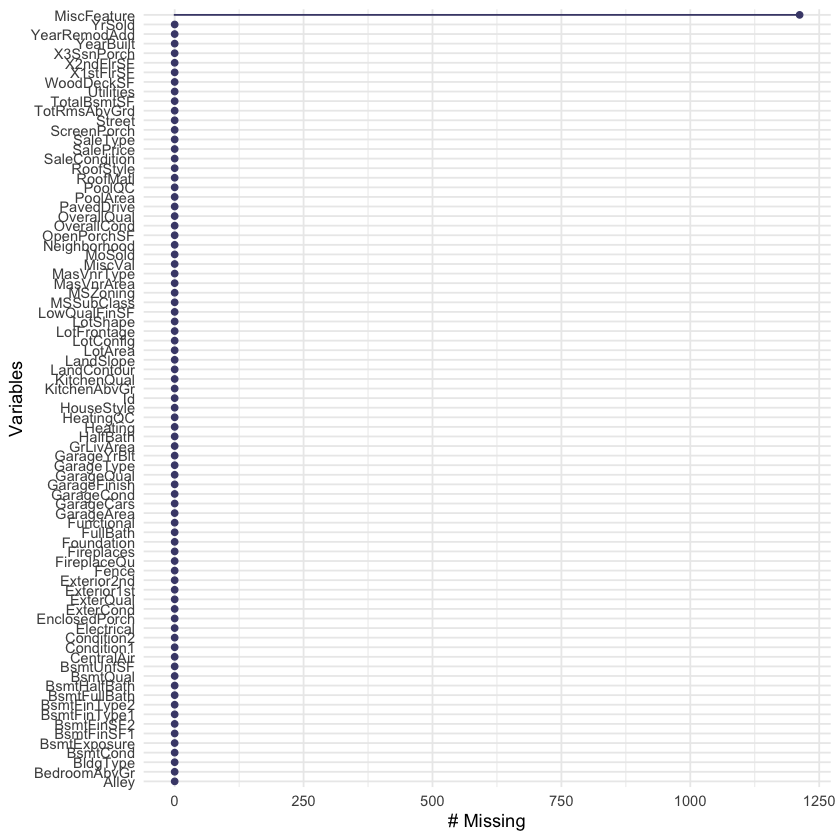

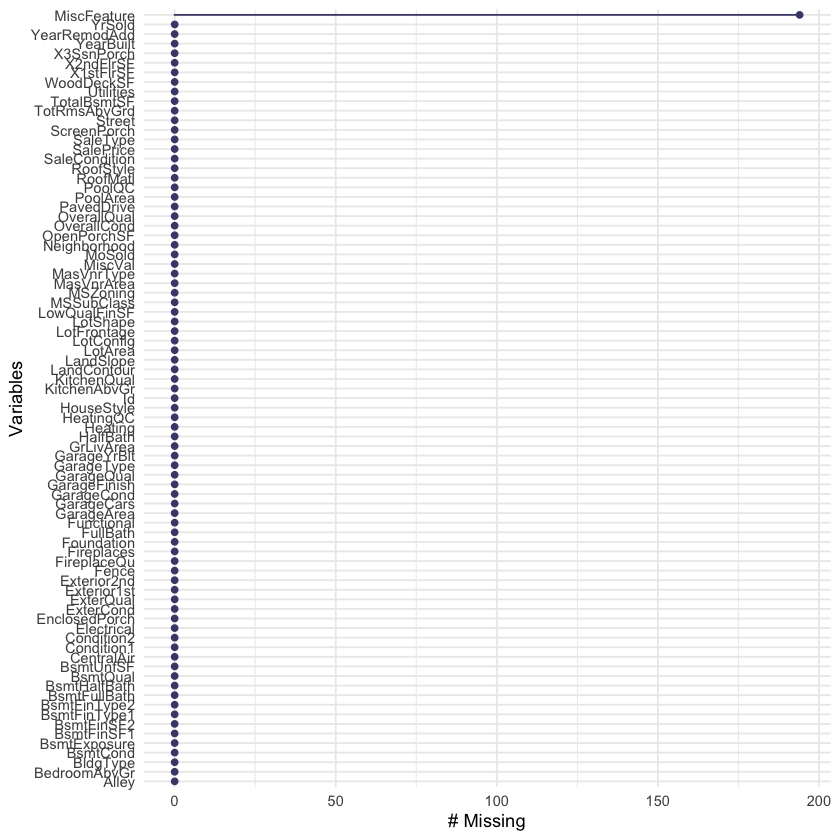

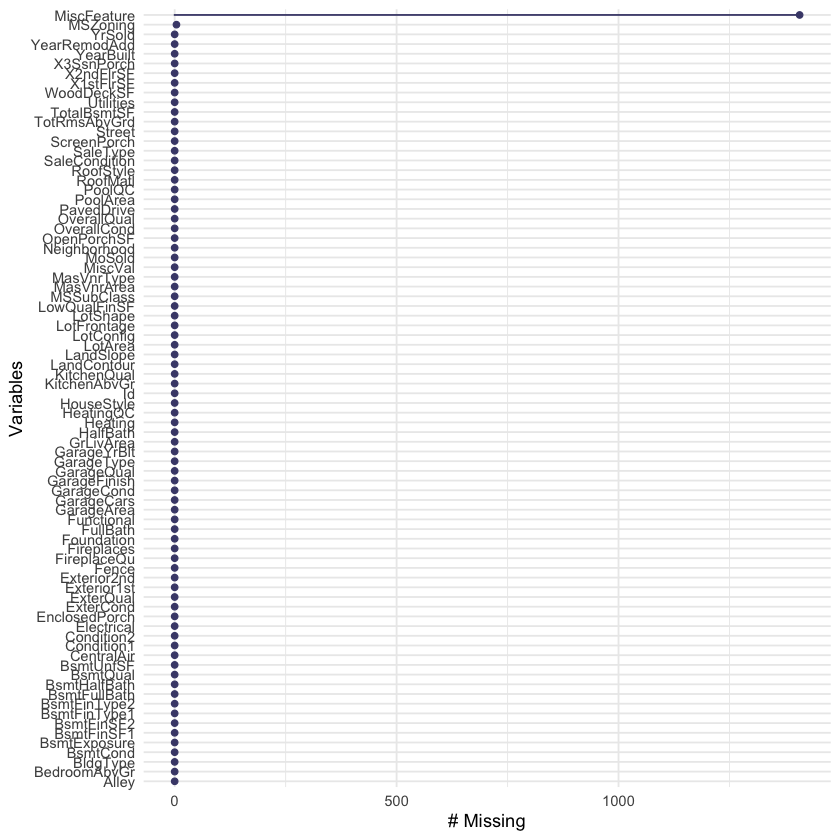

In [89]:

gg_miss_var(training_set)
gg_miss_var(validate_set)
gg_miss_var(test_set)

### Drop  MiscFeature Column
I was unsure how to clean and remove the NA from this column to get the best possible results. So I removed it from the Model completely.

In [251]:
#create a new set of files to factorize

head(training_set)

head(test_set)
training_set1=select(training_set,-c(75))
validate_set1=select(validate_set,-c(75))
test_set1=select(test_set,-c(75))


#
names(training_set1[,sapply(training_set1, is.character)])
names(validate_set1[,sapply(validate_set1, is.character)])
names(test_set1[,sapply(test_set1, is.character)])

names(training_set1)
head(validate_set1)
head(test_set1)


Id MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape LandContour
1 1  60         RL       65           8450   Pave   XX    Reg      Lvl        
2 2  20         RL       80           9600   Pave   XX    Reg      Lvl        
3 3  60         RL       68          11250   Pave   XX    IR1      Lvl        
5 5  60         RL       84          14260   Pave   XX    IR1      Lvl        
6 6  50         RL       85          14115   Pave   XX    IR1      Lvl        
7 7  20         RL       75          10084   Pave   XX    Reg      Lvl        
  Utilities ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold YrSold
1 AllPub    ... 0        XX     XX    NA            0      2     2008  
2 AllPub    ... 0        XX     XX    NA            0      5     2007  
3 AllPub    ... 0        XX     XX    NA            0      9     2008  
5 AllPub    ... 0        XX     XX    NA            0     12     2008  
6 AllPub    ... 0        XX     MnPrv Shed        700     10     2009  
7 AllPub    ... 0        XX     XX    NA            0      8     2007  
  SaleType SaleCondition SalePrice
1 WD       Normal        208500   
2 WD       Normal        181500   
3 WD       Normal        223500   
5 WD       Normal        250000   
6 WD       Normal        143000   
7 WD       Normal        307000

Id   MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape
1 1461  20        RH       80          11622   Pave   XX    Reg     
2 1462  20        RL       81          14267   Pave   XX    IR1     
3 1463  60        RL       74          13830   Pave   XX    IR1     
4 1464  60        RL       78           9978   Pave   XX    IR1     
5 1465 120        RL       43           5005   Pave   XX    IR1     
6 1466  60        RL       75          10000   Pave   XX    IR1     
  LandContour Utilities ... ScreenPorch PoolArea PoolQC Fence MiscFeature
1 Lvl         AllPub    ... 120         0        XX     MnPrv NA         
2 Lvl         AllPub    ...   0         0        XX     XX    Gar2       
3 Lvl         AllPub    ...   0         0        XX     MnPrv NA         
4 Lvl         AllPub    ...   0         0        XX     XX    NA         
5 HLS         AllPub    ... 144         0        XX     XX    NA         
6 Lvl         AllPub    ...   0         0        XX     XX    NA         
  MiscVal MoSold YrSold SaleType SaleCondition
1     0   6      2010   WD       Normal       
2 12500   6      2010   WD       Normal       
3     0   3      2010   WD       Normal       
4     0   6      2010   WD       Normal       
5     0   1      2010   WD       Normal       
6     0   4      2010   WD       Normal

[1] "Alley"        "MasVnrType"   "BsmtQual"     "BsmtCond"     "BsmtExposure"
 [6] "BsmtFinType1" "BsmtFinType2" "FireplaceQu"  "GarageType"   "GarageFinish"
[11] "GarageQual"   "GarageCond"   "PoolQC"       "Fence"

[1] "Alley"        "MasVnrType"   "BsmtQual"     "BsmtCond"     "BsmtExposure"
 [6] "BsmtFinType1" "BsmtFinType2" "FireplaceQu"  "GarageType"   "GarageFinish"
[11] "GarageQual"   "GarageCond"   "PoolQC"       "Fence"

[1] "Alley"        "MasVnrType"   "BsmtQual"     "BsmtCond"     "BsmtExposure"
 [6] "BsmtFinType1" "BsmtFinType2" "FireplaceQu"  "GarageType"   "GarageFinish"
[11] "GarageQual"   "GarageCond"   "PoolQC"       "Fence"

[1] "Id"            "MSSubClass"    "MSZoning"      "LotFrontage"  
 [5] "LotArea"       "Street"        "Alley"         "LotShape"     
 [9] "LandContour"   "Utilities"     "LotConfig"     "LandSlope"    
[13] "Neighborhood"  "Condition1"    "Condition2"    "BldgType"     
[17] "HouseStyle"    "OverallQual"   "OverallCond"   "YearBuilt"    
[21] "YearRemodAdd"  "RoofStyle"     "RoofMatl"      "Exterior1st"  
[25] "Exterior2nd"   "MasVnrType"    "MasVnrArea"    "ExterQual"    
[29] "ExterCond"     "Foundation"    "BsmtQual"      "BsmtCond"     
[33] "BsmtExposure"  "BsmtFinType1"  "BsmtFinSF1"    "BsmtFinType2" 
[37] "BsmtFinSF2"    "BsmtUnfSF"     "TotalBsmtSF"   "Heating"      
[41] "HeatingQC"     "CentralAir"    "Electrical"    "X1stFlrSF"    
[45] "X2ndFlrSF"     "LowQualFinSF"  "GrLivArea"     "BsmtFullBath" 
[49] "BsmtHalfBath"  "FullBath"      "HalfBath"      "BedroomAbvGr" 
[53] "KitchenAbvGr"  "KitchenQual"   "TotRmsAbvGrd"  "Functional"   
[57] "Fireplaces"    "FireplaceQu"   "GarageType"    "GarageYrBlt"  
[61] "GarageFinish"  "GarageCars"    "GarageArea"    "GarageQual"   
[65] "GarageCond"    "PavedDrive"    "WoodDeckSF"    "OpenPorchSF"  
[69] "EnclosedPorch" "X3SsnPorch"    "ScreenPorch"   "PoolArea"     
[73] "PoolQC"        "Fence"         "MiscVal"       "MoSold"       
[77] "YrSold"        "SaleType"      "SaleCondition" "SalePrice"

Id MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape LandContour
4   4  70        RL       60.00000     9550   Pave   XX    IR1      Lvl        
13 13  20        RL       67.73171    12968   Pave   XX    IR2      Lvl        
24 24 120        RM       44.00000     4224   Pave   XX    Reg      Lvl        
29 29  20        RL       47.00000    16321   Pave   XX    IR1      Lvl        
33 33  20        RL       85.00000    11049   Pave   XX    Reg      Lvl        
34 34  20        RL       70.00000    10552   Pave   XX    IR1      Lvl        
   Utilities ... ScreenPorch PoolArea PoolQC Fence MiscVal MoSold YrSold
4  AllPub    ...   0         0        XX     XX    0        2     2006  
13 AllPub    ... 176         0        XX     XX    0        9     2008  
24 AllPub    ...   0         0        XX     XX    0        6     2007  
29 AllPub    ...   0         0        XX     XX    0       12     2006  
33 AllPub    ...   0         0        XX     XX    0        1     2008  
34 AllPub    ...   0         0        XX     XX    0        4     2010  
   SaleType SaleCondition SalePrice
4  WD       Abnorml       140000   
13 WD       Normal        144000   
24 WD       Normal        129900   
29 WD       Normal        207500   
33 WD       Normal        179900   
34 WD       Normal        165500

Id   MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape
1 1461  20        RH       80          11622   Pave   XX    Reg     
2 1462  20        RL       81          14267   Pave   XX    IR1     
3 1463  60        RL       74          13830   Pave   XX    IR1     
4 1464  60        RL       78           9978   Pave   XX    IR1     
5 1465 120        RL       43           5005   Pave   XX    IR1     
6 1466  60        RL       75          10000   Pave   XX    IR1     
  LandContour Utilities ... X3SsnPorch ScreenPorch PoolArea PoolQC Fence
1 Lvl         AllPub    ... 0          120         0        XX     MnPrv
2 Lvl         AllPub    ... 0            0         0        XX     XX   
3 Lvl         AllPub    ... 0            0         0        XX     MnPrv
4 Lvl         AllPub    ... 0            0         0        XX     XX   
5 HLS         AllPub    ... 0          144         0        XX     XX   
6 Lvl         AllPub    ... 0            0         0        XX     XX   
  MiscVal MoSold YrSold SaleType SaleCondition
1     0   6      2010   WD       Normal       
2 12500   6      2010   WD       Normal       
3     0   3      2010   WD       Normal       
4     0   6      2010   WD       Normal       
5     0   1      2010   WD       Normal       
6     0   4      2010   WD       Normal

In [252]:
head(training_set1)
training_set1=select(training_set1,-c(1))
validate_set1=select(validate_set1,-c(1))
test_set1=select(test_set1,-c(1))


Id MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape LandContour
1 1  60         RL       65           8450   Pave   XX    Reg      Lvl        
2 2  20         RL       80           9600   Pave   XX    Reg      Lvl        
3 3  60         RL       68          11250   Pave   XX    IR1      Lvl        
5 5  60         RL       84          14260   Pave   XX    IR1      Lvl        
6 6  50         RL       85          14115   Pave   XX    IR1      Lvl        
7 7  20         RL       75          10084   Pave   XX    Reg      Lvl        
  Utilities ... ScreenPorch PoolArea PoolQC Fence MiscVal MoSold YrSold
1 AllPub    ... 0           0        XX     XX      0      2     2008  
2 AllPub    ... 0           0        XX     XX      0      5     2007  
3 AllPub    ... 0           0        XX     XX      0      9     2008  
5 AllPub    ... 0           0        XX     XX      0     12     2008  
6 AllPub    ... 0           0        XX     MnPrv 700     10     2009  
7 AllPub    ... 0           0        XX     XX      0      8     2007  
  SaleType SaleCondition SalePrice
1 WD       Normal        208500   
2 WD       Normal        181500   
3 WD       Normal        223500   
5 WD       Normal        250000   
6 WD       Normal        143000   
7 WD       Normal        307000

### Factorize Categorical Data

In [253]:
training_set1$Alley <- as.factor(training_set1$Alley)
training_set1$MasVnrType <- as.factor(training_set1$MasVnrType)
training_set1$BsmtQual <- as.factor(training_set1$BsmtQual)
training_set1$BsmtCond <- as.factor(training_set1$BsmtCond)
training_set1$BsmtExposure <- as.factor(training_set1$BsmtExposure)
training_set1$BsmtFinType1 <- as.factor(training_set1$BsmtFinType1)
training_set1$BsmtFinType2 <- as.factor(training_set1$BsmtFinType2)
training_set1$FireplaceQu <- as.factor(training_set1$FireplaceQu)
training_set1$GarageType <- as.factor(training_set1$GarageType)
training_set1$GarageFinish <- as.factor(training_set1$GarageFinish)
training_set1$GarageQual <- as.factor(training_set1$GarageQual)
training_set1$GarageCond <- as.factor(training_set1$GarageCond)
training_set1$PoolQC <- as.factor(training_set1$PoolQC)
training_set1$Fence <- as.factor(training_set1$Fence)
training_set1$Condition1 <- as.factor(training_set1$Condition1)
training_set1$Condition2 <- as.factor(training_set1$Condition2)
#training_set1$MSSubClass <- as.factor(training_set1$MSSubClass)


validate_set1$Alley <- as.factor(validate_set1$Alley)
validate_set1$MasVnrType <- as.factor(validate_set1$MasVnrType)
validate_set1$BsmtQual <- as.factor(validate_set1$BsmtQual)
validate_set1$BsmtCond <- as.factor(validate_set1$BsmtCond)
validate_set1$BsmtExposure <- as.factor(validate_set1$BsmtExposure)
validate_set1$BsmtFinType1 <- as.factor(validate_set1$BsmtFinType1)
validate_set1$BsmtFinType2 <- as.factor(validate_set1$BsmtFinType2)
validate_set1$FireplaceQu <- as.factor(validate_set1$FireplaceQu)
validate_set1$GarageType <- as.factor(validate_set1$GarageType)
validate_set1$GarageFinish <- as.factor(validate_set1$GarageFinish)
validate_set1$GarageQual <- as.factor(validate_set1$GarageQual)
validate_set1$GarageCond <- as.factor(validate_set1$GarageCond)
validate_set1$PoolQC <- as.factor(validate_set1$PoolQC)
validate_set1$Fence <- as.factor(validate_set1$Fence)
validate_set1$Condition2 <- as.factor(training_set1$Condition2)
validate_set1$Condition2 <- as.factor(training_set1$Condition2)


test_set1$Alley <- as.factor(test_set1$Alley)
test_set1$MasVnrType <- as.factor(test_set1$MasVnrType)
test_set1$BsmtQual <- as.factor(test_set1$BsmtQual)
test_set1$BsmtCond <- as.factor(test_set1$BsmtCond)
test_set1$BsmtExposure <- as.factor(test_set1$BsmtExposure)
test_set1$BsmtFinType1 <- as.factor(test_set1$BsmtFinType1)
test_set1$BsmtFinType2 <- as.factor(test_set1$BsmtFinType2)
test_set1$FireplaceQu <- as.factor(test_set1$FireplaceQu)
test_set1$GarageType <- as.factor(test_set1$GarageType)
test_set1$GarageFinish <- as.factor(test_set1$GarageFinish)
test_set1$GarageQual <- as.factor(test_set1$GarageQual)
test_set1$GarageCond <- as.factor(test_set1$GarageCond)
test_set1$PoolQC <- as.factor(test_set1$PoolQC)
test_set1$Fence <- as.factor(test_set1$Fence)


names(training_set1[,sapply(training_set1, is.character)])
names(validate_set1[,sapply(validate_set1, is.character)])
names(test_set1[,sapply(test_set1, is.character)])



ERROR: Error in `$<-.data.frame`(`*tmp*`, Condition2, value = structure(c(3L, : replacement has 1258 rows, data has 202


In [254]:
ncol(training_set1)
ncol(validate_set1)
ncol(test_set1)

[1] 79

[1] 79

[1] 78

In [235]:
#for(i in 1:79){
 #   training_set1[,i] <- as.factor(training_set1[,i])
    #print(is.factor(training_set1[,i]))
#}
#for(i in 1:79){
 #   validate_set1[,i] <- as.factor(training_set1[,i])
    #print(is.factor(training_set1[,i]))
#}
#for(i in 1:79){
 #   test_set1[,i] <- as.factor(training_set1[,i])
    #print(is.factor(training_set1[,i]))
#}

In [255]:
### Data Encoding results
summary(training_set1)


   MSSubClass        MSZoning    LotFrontage        LotArea        Street    
 Min.   : 20.00   C (all):  9   Min.   : 21.00   Min.   :  1300   Grvl:   6  
 1st Qu.: 20.00   FV     : 60   1st Qu.: 60.00   1st Qu.:  7564   Pave:1252  
 Median : 50.00   RH     : 15   Median : 70.42   Median :  9551              
 Mean   : 56.59   RL     :993   Mean   : 70.42   Mean   : 10631              
 3rd Qu.: 70.00   RM     :181   3rd Qu.: 79.00   3rd Qu.: 11659              
 Max.   :190.00                 Max.   :313.00   Max.   :215245              
                                                                             
  Alley      LotShape  LandContour  Utilities      LotConfig   LandSlope 
 Grvl:  38   IR1:417   Bnk:  57    AllPub:1257   Corner :220   Gtl:1190  
 Pave:  32   IR2: 35   HLS:  46    NoSeWa:   1   CulDSac: 80   Mod:  55  
 XX  :1188   IR3:  8   Low:  31                  FR2    : 40   Sev:  13  
             Reg:798   Lvl:1124                  FR3    :  3             
      

In [256]:
summary(validate_set1)

   MSSubClass        MSZoning    LotFrontage        LotArea       Street   
 Min.   : 20.00   C (all):  1   Min.   : 21.00   Min.   : 1477   Grvl:  0  
 1st Qu.: 20.00   FV     :  5   1st Qu.: 60.00   1st Qu.: 7335   Pave:202  
 Median : 50.00   RH     :  1   Median : 67.73   Median : 9115             
 Mean   : 58.81   RL     :158   Mean   : 67.73   Mean   : 9806             
 3rd Qu.: 75.00   RM     : 37   3rd Qu.: 75.75   3rd Qu.:10912             
 Max.   :190.00                 Max.   :152.00   Max.   :53107             
                                                                           
  Alley     LotShape  LandContour  Utilities     LotConfig   LandSlope
 Grvl: 12   IR1: 67   Bnk:  6     AllPub:202   Corner : 43   Gtl:192  
 Pave:  9   IR2:  6   HLS:  4     NoSeWa:  0   CulDSac: 14   Mod: 10  
 XX  :181   IR3:  2   Low:  5                  FR2    :  7   Sev:  0  
            Reg:127   Lvl:187                  FR3    :  1            
                                     

### Data Pre- Modeling
For Feature Selection I ran 2 models on the fill dataset after cleaning.

    To determine fields that will give me the best P-value, I ran a multiple linear 
    regression model. This will show and help me to identify the field a that will 
    give me P-values >0.5.  I can then uses these fields to get a better model.
    
    I also also ran a decision tree model to see if I would get the same fields/features 
    as the linear regression model

In [257]:
#validate_set1
library(e1071)

regressor = lm(formula = SalePrice ~ .,
               data = training_set1)
summary(regressor)
    



Call:
lm(formula = SalePrice ~ ., data = training_set1)

Residuals:
    Min      1Q  Median      3Q     Max 
-177116   -9769      36    9941  177116 

Coefficients: (8 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.159e+06  1.174e+06  -0.987 0.324063    
MSSubClass           -9.577e+01  8.819e+01  -1.086 0.277746    
MSZoningFV            3.834e+04  1.304e+04   2.941 0.003350 ** 
MSZoningRH            2.877e+04  1.300e+04   2.214 0.027062 *  
MSZoningRL            3.153e+04  1.109e+04   2.843 0.004554 ** 
MSZoningRM            2.989e+04  1.034e+04   2.890 0.003939 ** 
LotFrontage           7.111e+01  4.937e+01   1.440 0.150134    
LotArea               6.054e-01  1.190e-01   5.090 4.27e-07 ***
StreetPave            2.393e+04  1.297e+04   1.845 0.065310 .  
AlleyPave             3.465e+03  7.319e+03   0.474 0.635941    
AlleyXX              -2.589e+03  4.949e+03  -0.523 0.600961    
LotShapeIR2           4.0

In [258]:
#See predictions:

library(e1071)

regressor = lm(formula = SalePrice ~ .,
               data = training_set1)
summary(regressor)


y_pred=predict(regressor, newdata=validate_set1)





Call:
lm(formula = SalePrice ~ ., data = training_set1)

Residuals:
    Min      1Q  Median      3Q     Max 
-177116   -9769      36    9941  177116 

Coefficients: (8 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.159e+06  1.174e+06  -0.987 0.324063    
MSSubClass           -9.577e+01  8.819e+01  -1.086 0.277746    
MSZoningFV            3.834e+04  1.304e+04   2.941 0.003350 ** 
MSZoningRH            2.877e+04  1.300e+04   2.214 0.027062 *  
MSZoningRL            3.153e+04  1.109e+04   2.843 0.004554 ** 
MSZoningRM            2.989e+04  1.034e+04   2.890 0.003939 ** 
LotFrontage           7.111e+01  4.937e+01   1.440 0.150134    
LotArea               6.054e-01  1.190e-01   5.090 4.27e-07 ***
StreetPave            2.393e+04  1.297e+04   1.845 0.065310 .  
AlleyPave             3.465e+03  7.319e+03   0.474 0.635941    
AlleyXX              -2.589e+03  4.949e+03  -0.523 0.600961    
LotShapeIR2           4.0

ERROR: Error in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels): factor Condition2 has new levels RRAe


In [259]:
t(validate_set1[,79])
t(y_pred)

[,1]   [,2]   [,3]   [,4]   [,5]   [,6]   [,7]   [,8]   [,9]   [,10] 
[1,] 140000 144000 129900 207500 179900 165500 145000 144000 141000 180000
     [,11] [,12]  [,13]  [,14]  [,15]  [,16]  [,17] [,18]  [,19]  [,20]  [,21]
[1,] ...   167500 157000 105000 250000 138000 90000 140000 120500 145000 84500

4        13       24       29       33       34       37       43      
[1,] 194781.6 194781.6 125793.8 194781.6 194781.6 194781.6 194781.6 194781.6
     45       67       ... 1380     1383     1385     1387     1399    
[1,] 194781.6 194781.6 ... 194781.6 125793.8 194781.6 194781.6 194781.6
     1413     1428     1437     1453     1454    
[1,] 194781.6 194781.6 194781.6 125793.8 194781.6

Warning message in predict.lm(regressor, newdata = training_set1):
“prediction from a rank-deficient fit may be misleading”

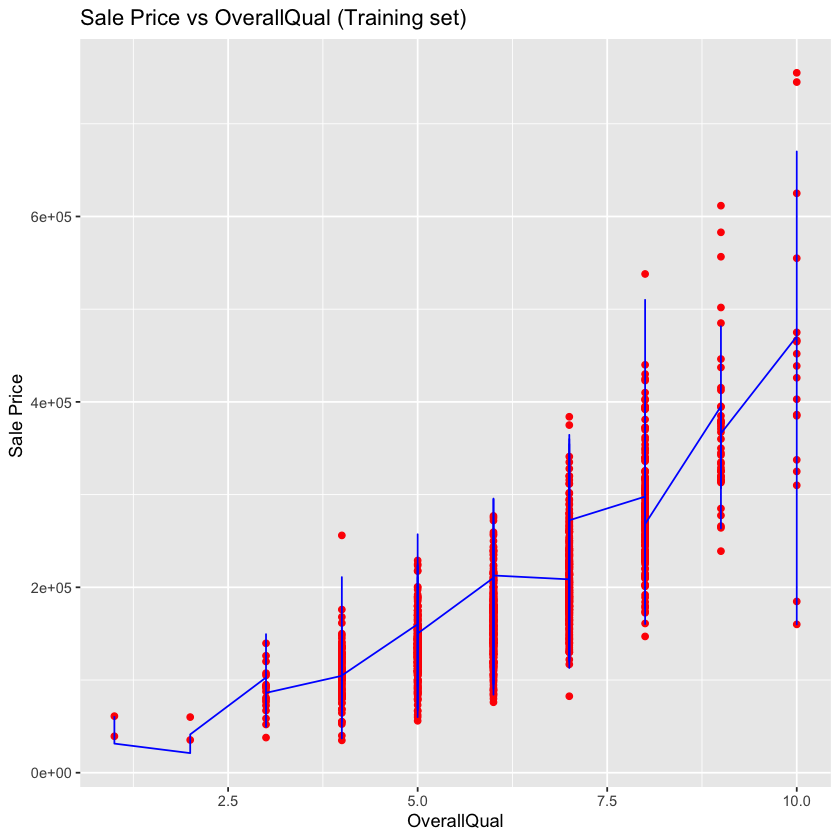

In [260]:
# Visualising the Training set results
library(ggplot2)
ggplot() +
  geom_point(aes(x = training_set1$OverallQual, y = training_set1$SalePrice),
             colour = 'red') +
  geom_line(aes(x = training_set1$OverallQual, y = predict(regressor, newdata = training_set1)),
            colour = 'blue') +
  ggtitle('Sale Price vs OverallQual (Training set)') +
  xlab('OverallQual') +
  ylab('Sale Price ')




In [261]:
library(rpart)
dt_regressor = rpart(formula = SalePrice ~ .,
               data = training_set1,
               control = rpart.control(minsplit = 80))

summary(dt_regressor)



Call:
rpart(formula = SalePrice ~ ., data = training_set1, control = rpart.control(minsplit = 80))
  n= 1258 

          CP nsplit rel error    xerror       xstd
1 0.47568381      0 1.0000000 1.0015597 0.07991725
2 0.11045339      1 0.5243162 0.5259452 0.04234905
3 0.06037126      2 0.4138628 0.4324767 0.04122423
4 0.03420753      3 0.3534915 0.3829964 0.03157161
5 0.02021774      4 0.3192840 0.3467972 0.03086346
6 0.01760636      5 0.2990663 0.3272652 0.02966435
7 0.01286536      6 0.2814599 0.3048932 0.02867216
8 0.01000000      7 0.2685945 0.2924767 0.02866917

Variable importance
 OverallQual Neighborhood     BsmtQual   GarageCars   GarageArea  KitchenQual 
          27           14           11            9            8            8 
   ExterQual    GrLivArea    YearBuilt     FullBath   Foundation    X2ndFlrSF 
           4            4            3            2            2            1 
   X1stFlrSF  TotalBsmtSF TotRmsAbvGrd BedroomAbvGr   HouseStyle 
           1            1  

In [264]:
y_pred = predict(dt_regressor,validate_set1)

## Modeling with Multiple Linear REGRESSION
### With Feature Selection from Decision Tree

Variable importance
 OverallQual Neighborhood     BsmtQual   GarageCars   GarageArea  KitchenQual 
          27           14           11            9            8            8 
   ExterQual    GrLivArea    YearBuilt     FullBath   Foundation    X2ndFlrSF 
           4            4            3            2            2            1 
   X1stFlrSF  TotalBsmtSF TotRmsAbvGrd BedroomAbvGr   HouseStyle 
           1            1            1            1            1 

In [287]:

training_set2=training_set1 %>% select(OverallQual,Neighborhood,BsmtQual,
                                       GarageCars,GarageArea,KitchenQual,ExterQual,GrLivArea,
                                       YearBuilt,FullBath,Foundation,X2ndFlrSF,X1stFlrSF,TotalBsmtSF,
                                       TotRmsAbvGrd,BedroomAbvGr,HouseStyle,SalePrice )

validate_set2=validate_set1 %>% select(OverallQual,Neighborhood,BsmtQual,
                                       GarageCars,GarageArea,KitchenQual,ExterQual,GrLivArea,
                                       YearBuilt,FullBath,Foundation,X2ndFlrSF,X1stFlrSF,TotalBsmtSF,
                                       TotRmsAbvGrd,BedroomAbvGr,HouseStyle,SalePrice )
test_set2=test_set1 %>% select(OverallQual,Neighborhood,BsmtQual,
                                       GarageCars,GarageArea,KitchenQual,ExterQual,GrLivArea,
                                       YearBuilt,FullBath,Foundation,X2ndFlrSF,X1stFlrSF,TotalBsmtSF,
                                       TotRmsAbvGrd,BedroomAbvGr,HouseStyle)



In [289]:
ncol(training_set2)
ncol(validate_set2)
ncol(test_set2)

[1] 18

[1] 18

[1] 17

In [291]:
library(e1071)

ml_regessor =lm(formula = SalePrice ~.,
                 data = training_set2,
                 type='eps-regression'
                 )



Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘type’ will be disregarded”

In [292]:
summary(ml_regessor)
y_pred_ml = predict(ml_regessor, validate_set2)




Call:
lm(formula = SalePrice ~ ., data = training_set2, type = "eps-regression")

Residuals:
    Min      1Q  Median      3Q     Max 
-366437  -13657     245   14141  201086 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          35303.603 183097.387   0.193 0.847138    
OverallQual          12582.951   1366.314   9.209  < 2e-16 ***
NeighborhoodBlueste  -4382.991  25694.717  -0.171 0.864583    
NeighborhoodBrDale   -7334.655  13427.122  -0.546 0.584991    
NeighborhoodBrkSide  16231.854  11550.997   1.405 0.160211    
NeighborhoodClearCr  39466.721  11928.015   3.309 0.000965 ***
NeighborhoodCollgCr  25581.217   9475.557   2.700 0.007038 ** 
NeighborhoodCrawfor  39378.013  11162.066   3.528 0.000435 ***
NeighborhoodEdwards  -1390.214  10530.425  -0.132 0.894992    
NeighborhoodGilbert  22921.972   9934.828   2.307 0.021211 *  
NeighborhoodIDOTRR   -1864.321  12145.602  -0.153 0.878032    
NeighborhoodMeadowV  -2883.416  13868.146  -0.208 0.8

In [296]:
t(validate_set2[,18])

t(y_pred_ml)

[,1]   [,2]   [,3]   [,4]   [,5]   [,6]   [,7]   [,8]   [,9]   [,10] 
[1,] 140000 144000 129900 207500 179900 165500 145000 144000 141000 180000
     [,11] [,12]  [,13]  [,14]  [,15]  [,16]  [,17] [,18]  [,19]  [,20]  [,21]
[1,] ...   167500 157000 105000 250000 138000 90000 140000 120500 145000 84500

4        13       24     29       33       34     37       43      
[1,] 216499.1 115828.8 119331 155713.5 242040.4 170534 149745.8 148893.3
     45       67       ... 1380     1383     1385     1387     1399    
[1,] 128202.7 224722.6 ... 185058.2 156608.7 117900.1 264602.9 163712.3
     1413     1428     1437     1453     1454    
[1,] 100808.3 137002.1 103075.5 114173.5 113779.6

[,1]   [,2]   [,3]   [,4]   [,5]   [,6]   [,7]   [,8]   [,9]   [,10] 
[1,] 140000 144000 129900 207500 179900 165500 145000 144000 141000 180000
     [,11] [,12]  [,13]  [,14]  [,15]  [,16]  [,17] [,18]  [,19]  [,20]  [,21]
[1,] ...   167500 157000 105000 250000 138000 90000 140000 120500 145000 84500

4      13       24       29       33       34       37     43     45      
[1,] 227777 117330.5 151972.9 151972.9 254282.9 151972.9 135175 135175 151972.9
     67       ... 1380     1383     1385     1387   1399     1413     1428    
[1,] 151972.9 ... 183882.4 117330.5 117330.5 227777 151972.9 117330.5 117330.5
     1437     1453     1454    
[1,] 117330.5 151972.9 151972.9

[1] "Compute the log loss/cross-entropy loss"


[1] 25127.3

[1] "Compute the Median absolute percentage error regression loss."


[1] 0.1159601

[1] "Correlation Accurracy"


actuals  predicteds
actuals    1.000000 0.764471  
predicteds 0.764471 1.000000

[1] "Plots of residuals"


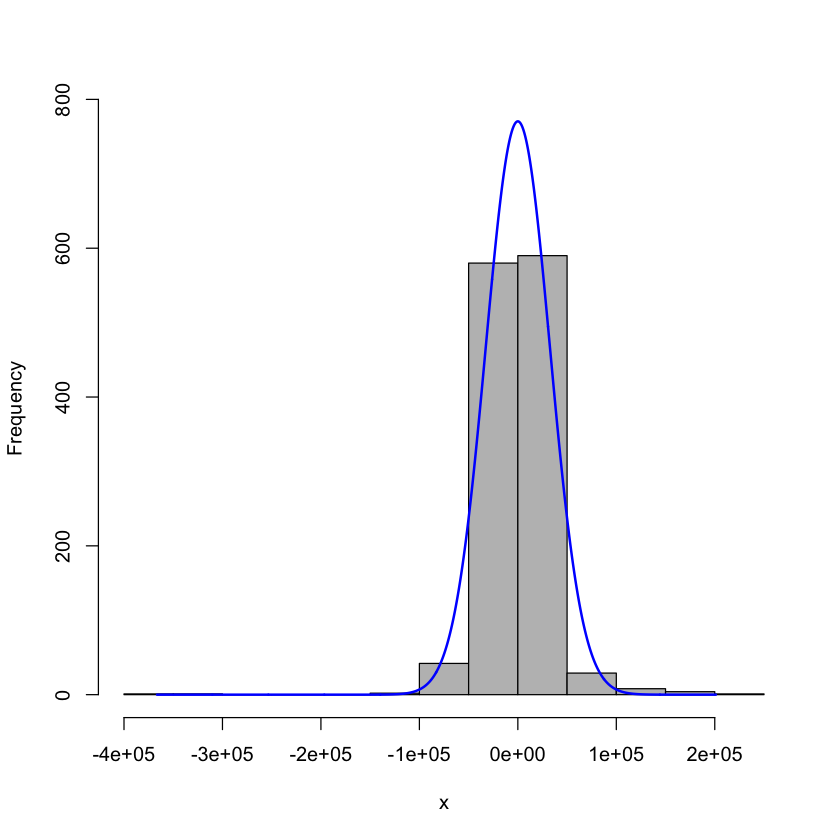

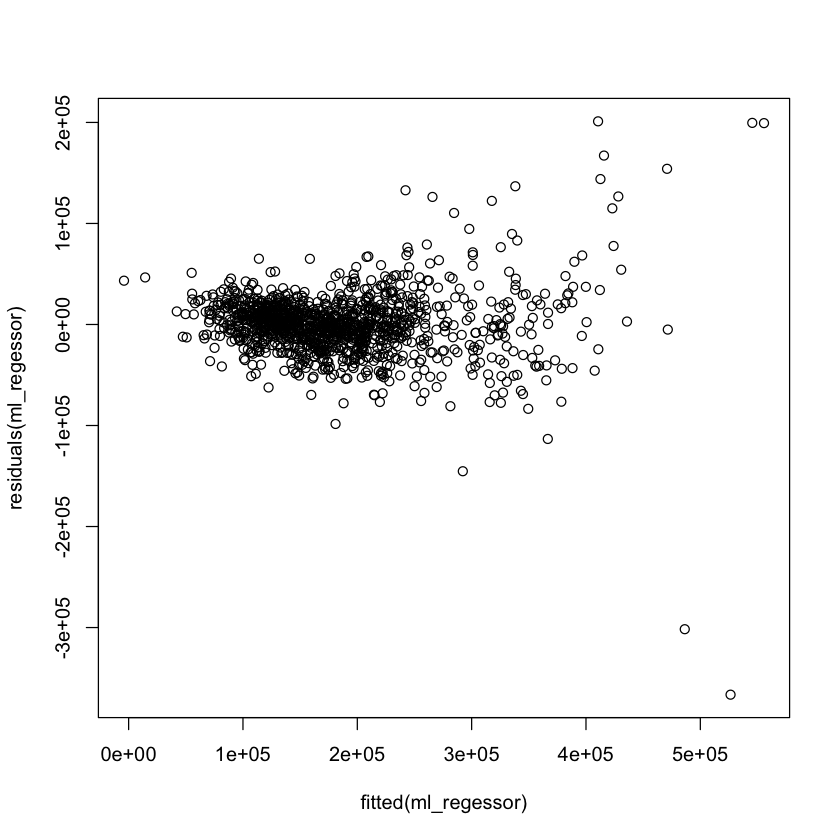

In [382]:

#install.packages("MLmetrics")
library(MLmetrics)
cm = table(validate_set2[, 18], y_pred)
r=pluck(y_pred)
x=validate_set2[, 18]

t(x)
t(r)

#Compute the log loss/cross-entropy loss.
print('Compute the log loss/cross-entropy loss')
MAE(y_pred=y_pred, y_true=validate_set2[, 18])

#Compute the Median absolute percentage error regression loss.
print('Compute the Median absolute percentage error regression loss.')
MedianAPE(y_pred=y_pred, y_true=validate_set2[, 18])


### Confusion matrix
cm2=ConfusionMatrix(y_pred=y_pred, y_true=validate_set2[, 18])


#summary(cm2)


actuals_preds = data.frame(cbind(actuals=validate_set2[, 18], predicteds=y_pred)) 

#actuals_preds


#Correlation Accurracy
print('Correlation Accurracy')
correlation_accuracy = cor(actuals_preds)
correlation_accuracy


x = residuals(ml_regessor)


print('Plots of residuals')
library(rcompanion)

plotNormalHistogram(x)

plot(fitted(ml_regessor),
     residuals(ml_regessor))

[1] "Plot data with best fit line"


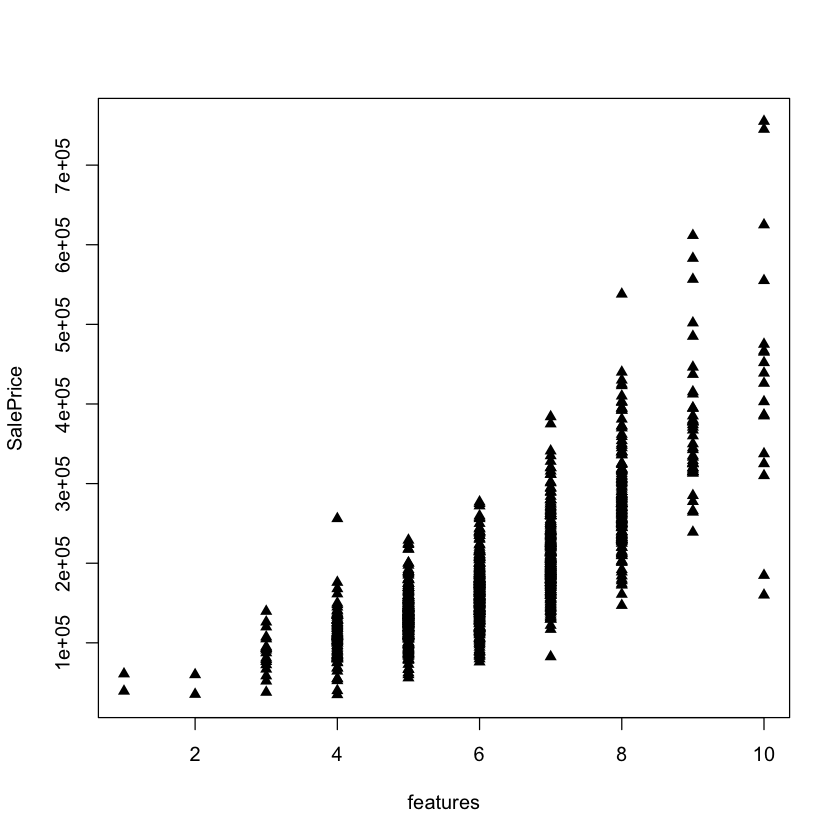

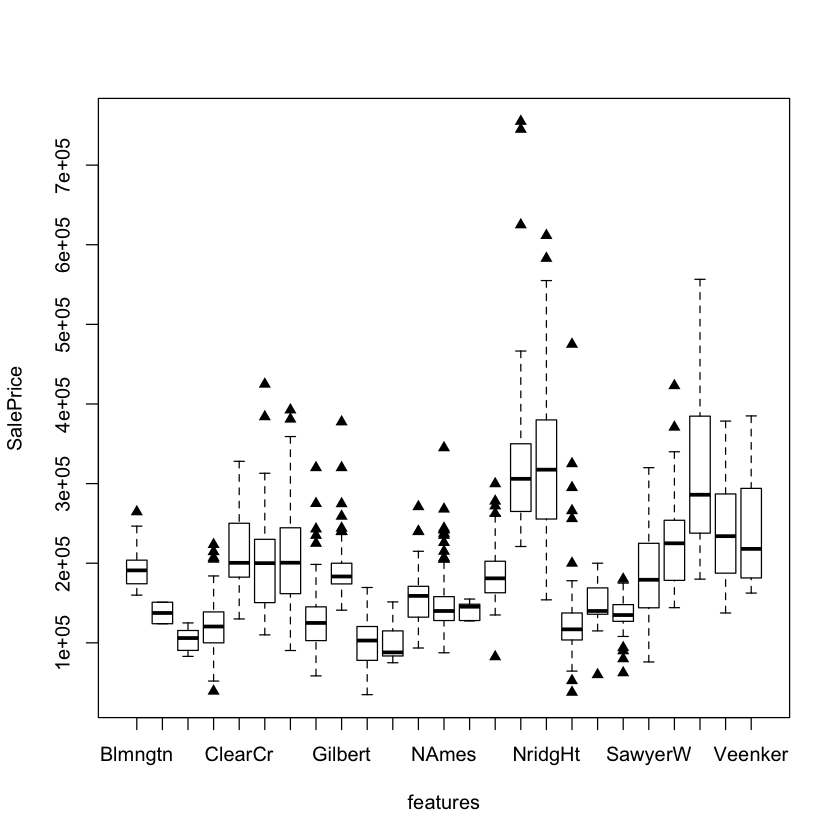

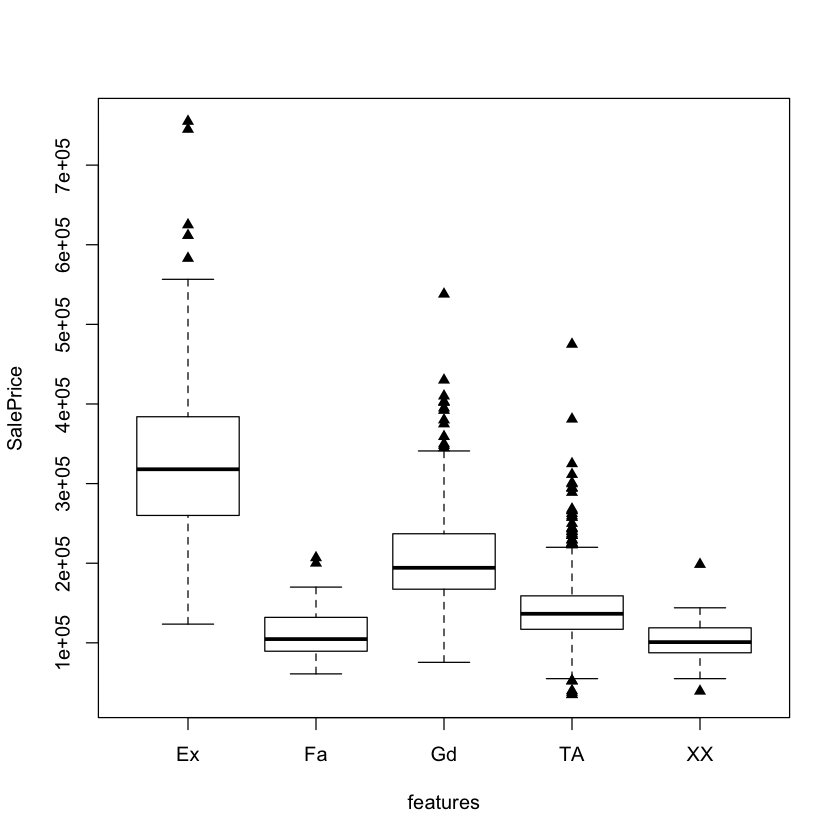

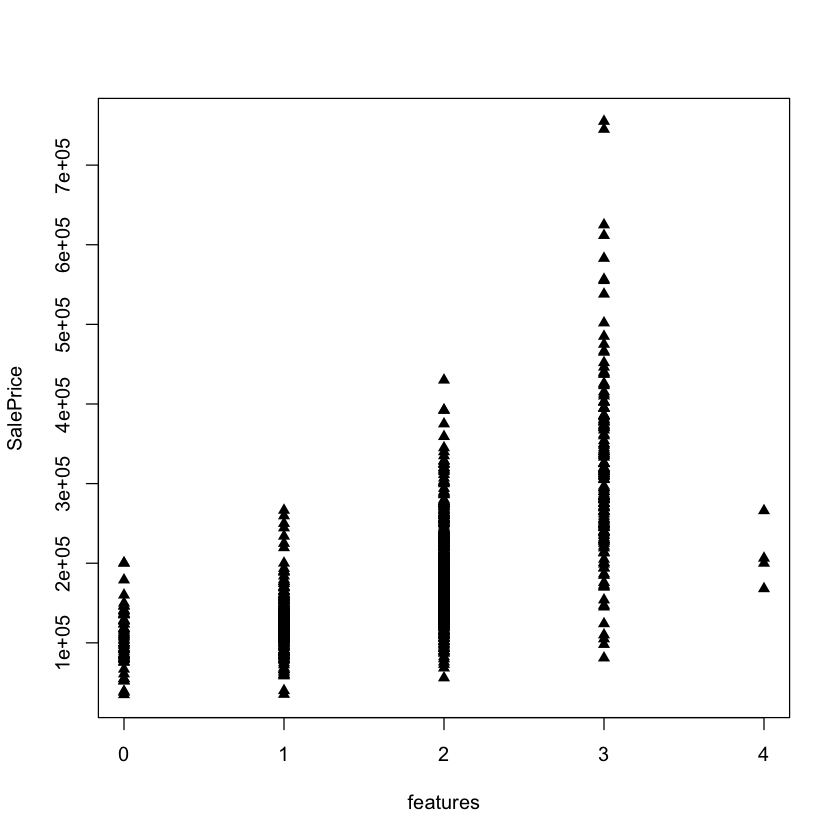

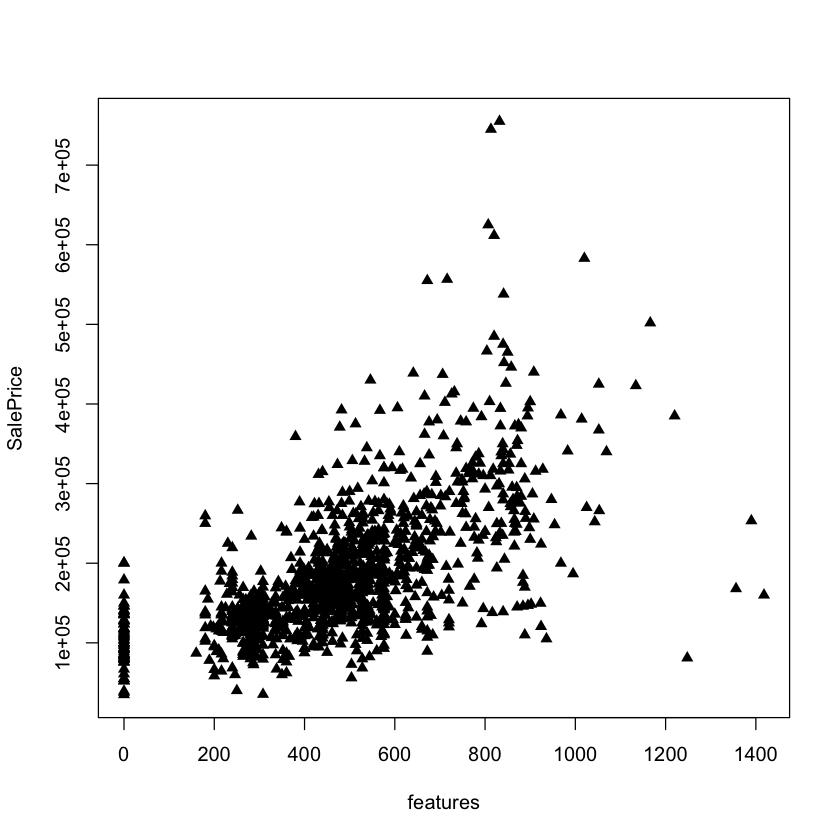

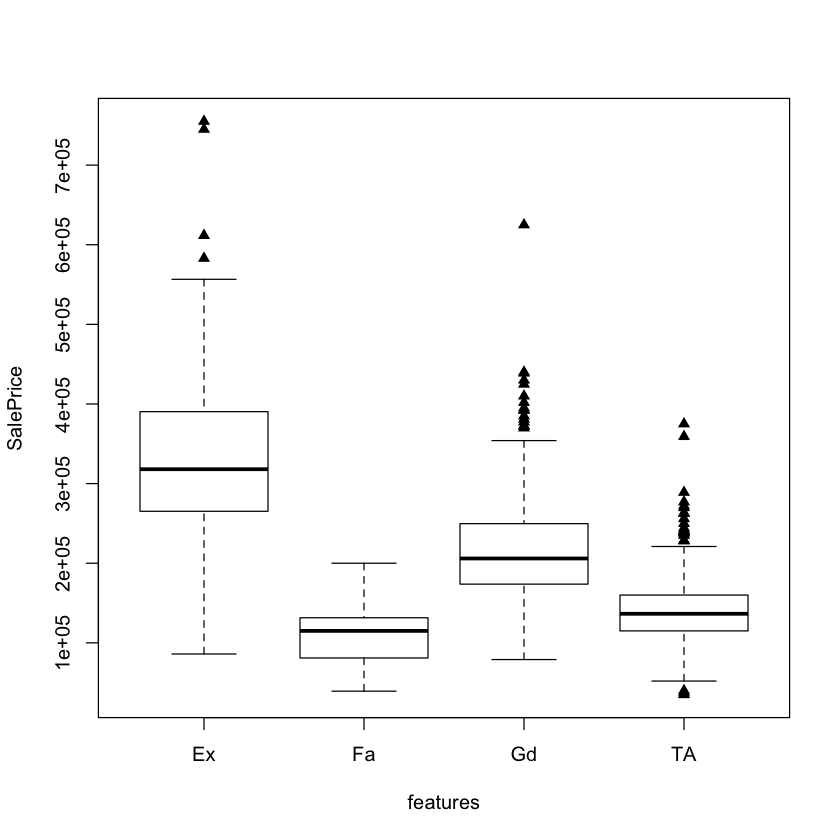

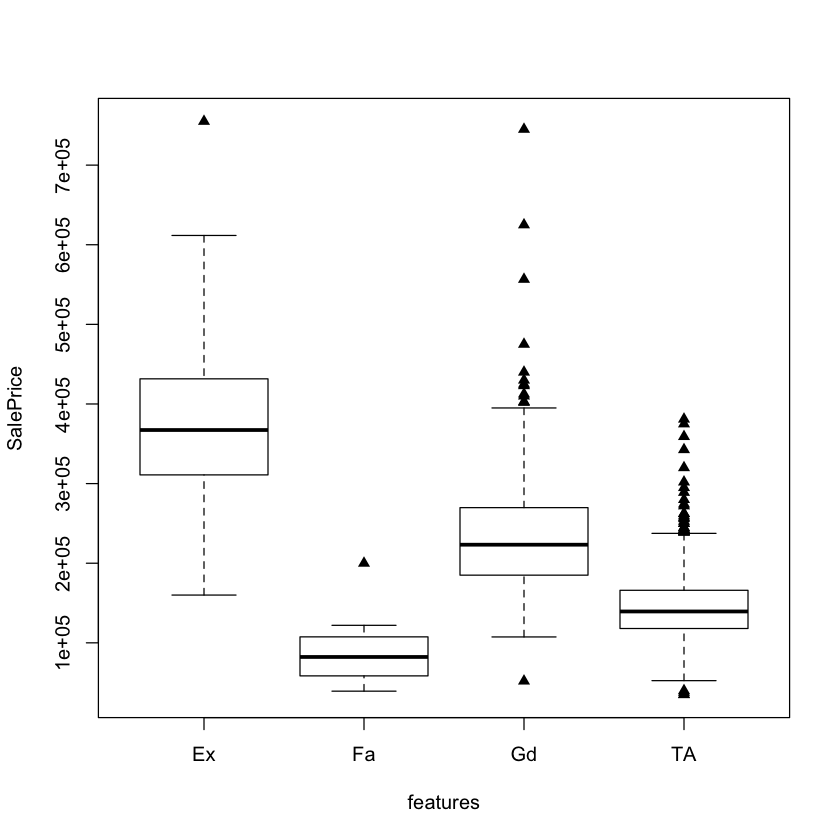

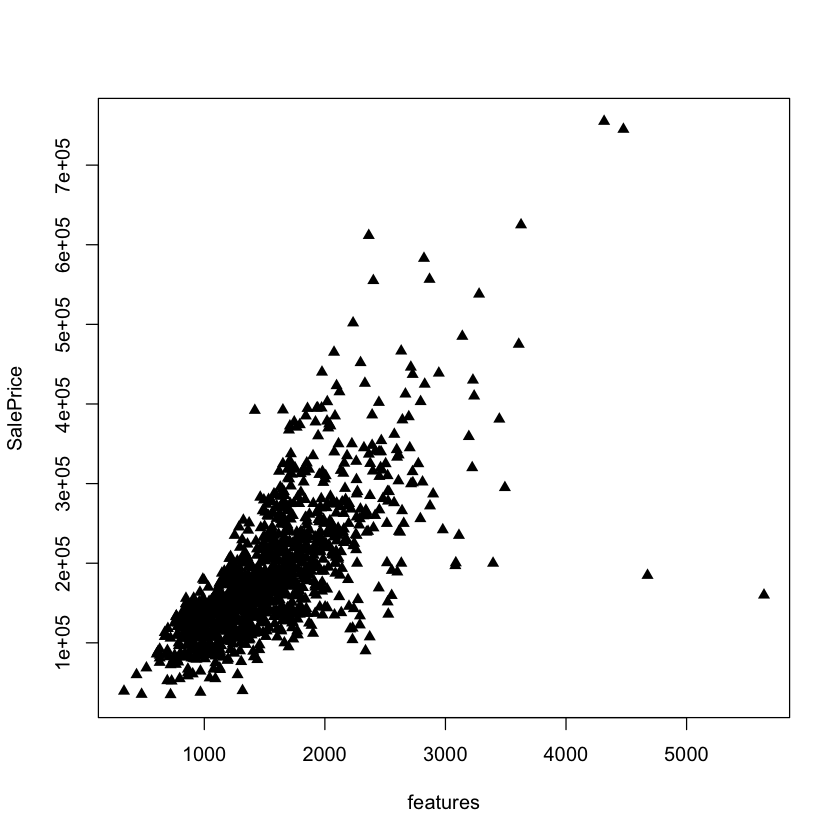

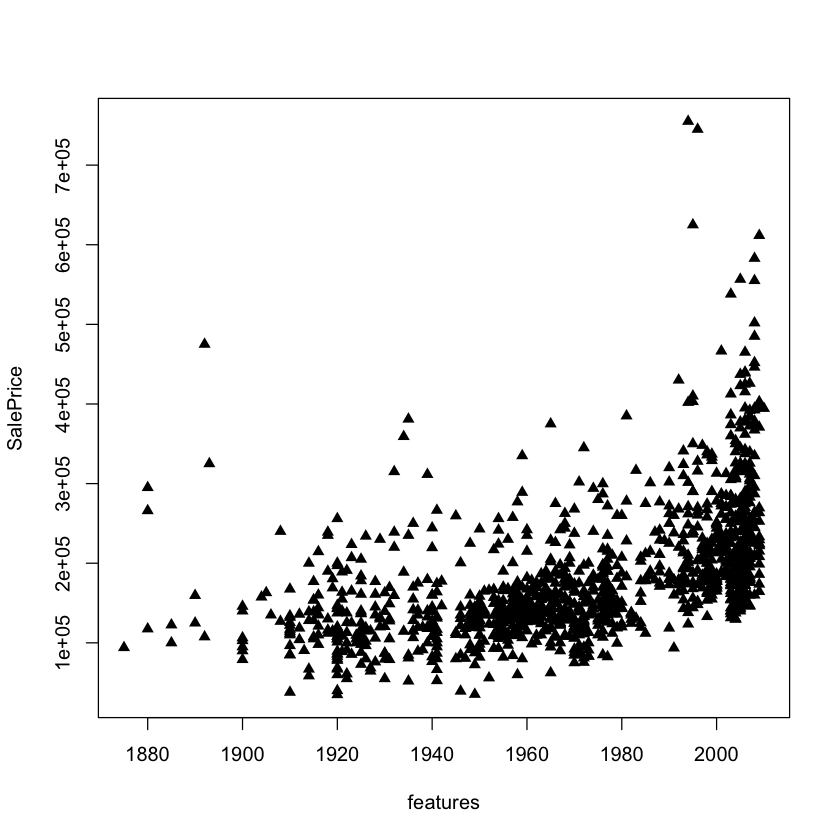

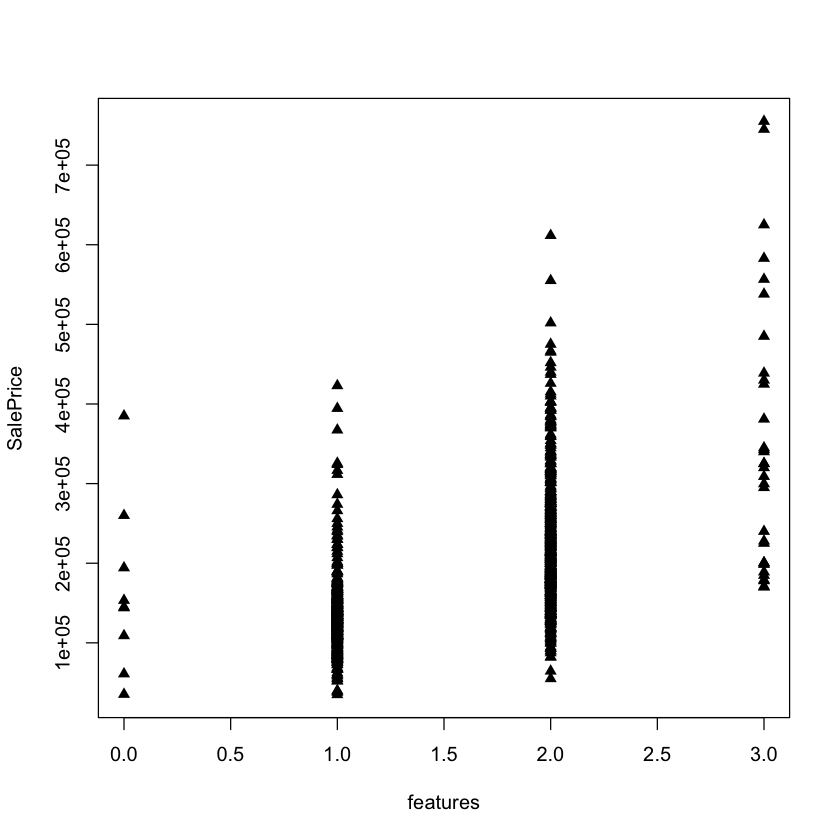

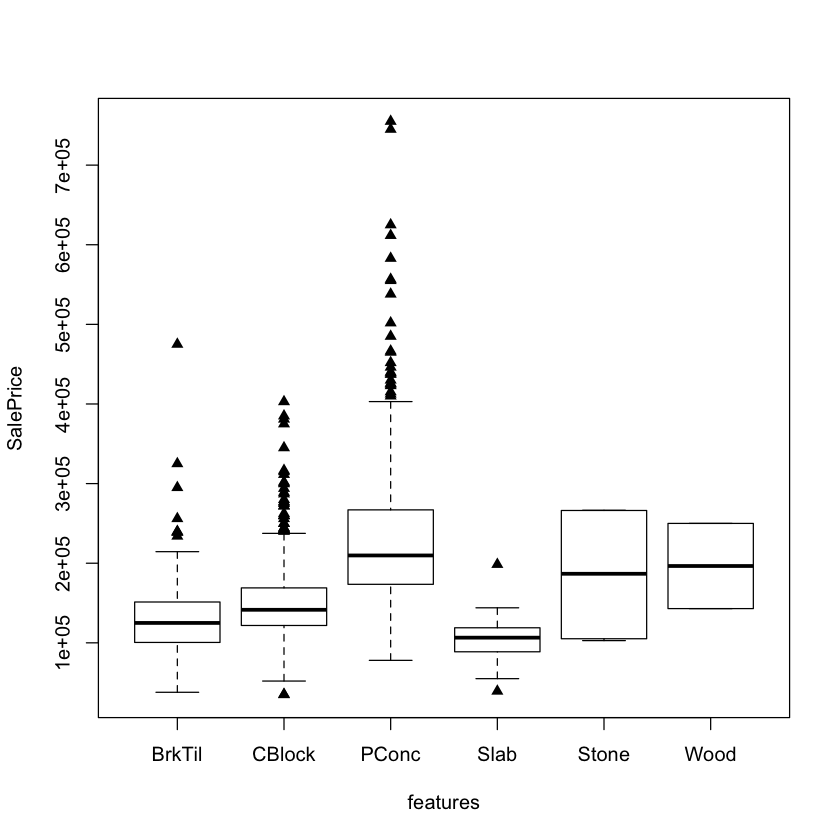

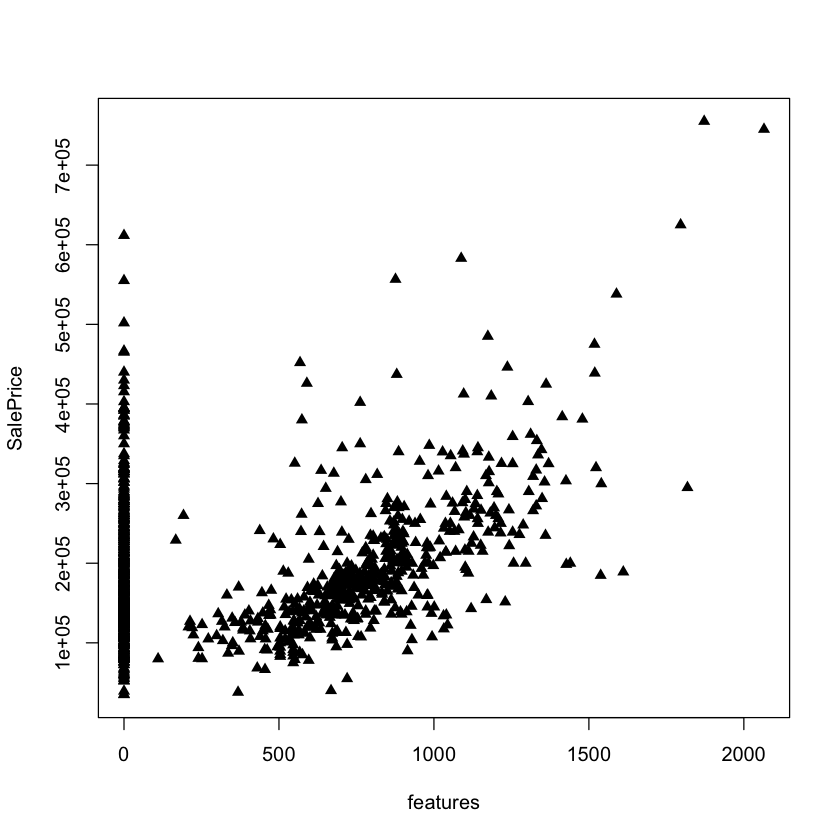

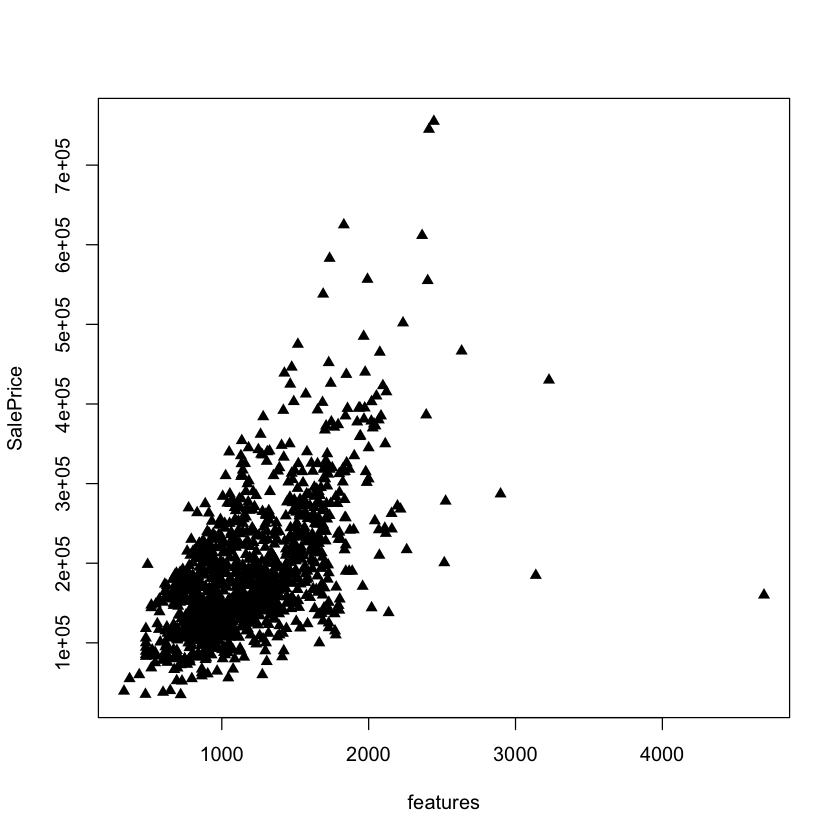

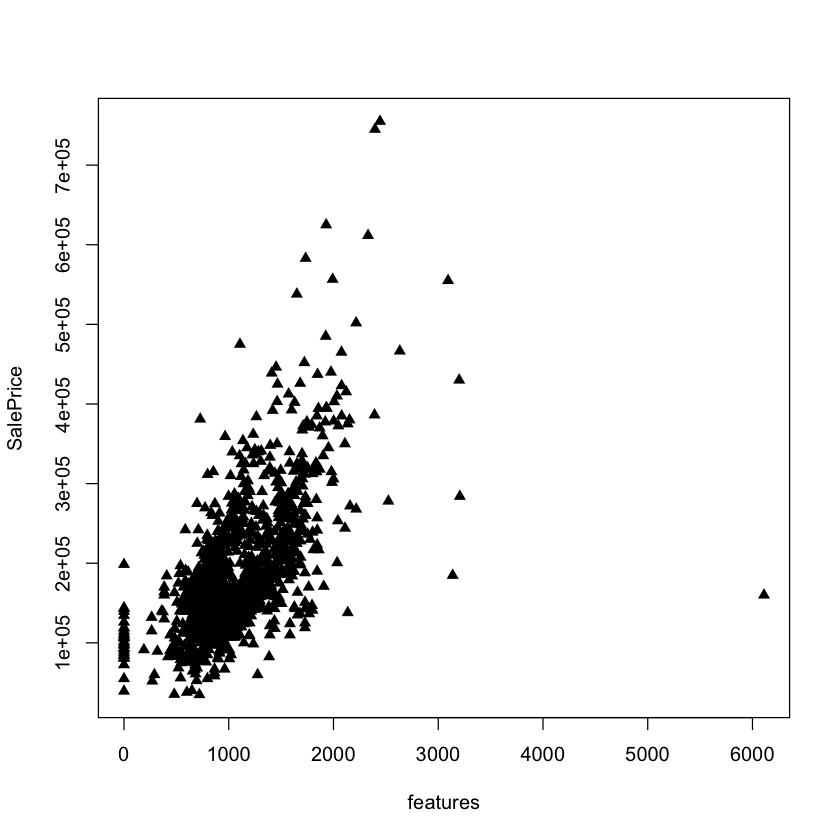

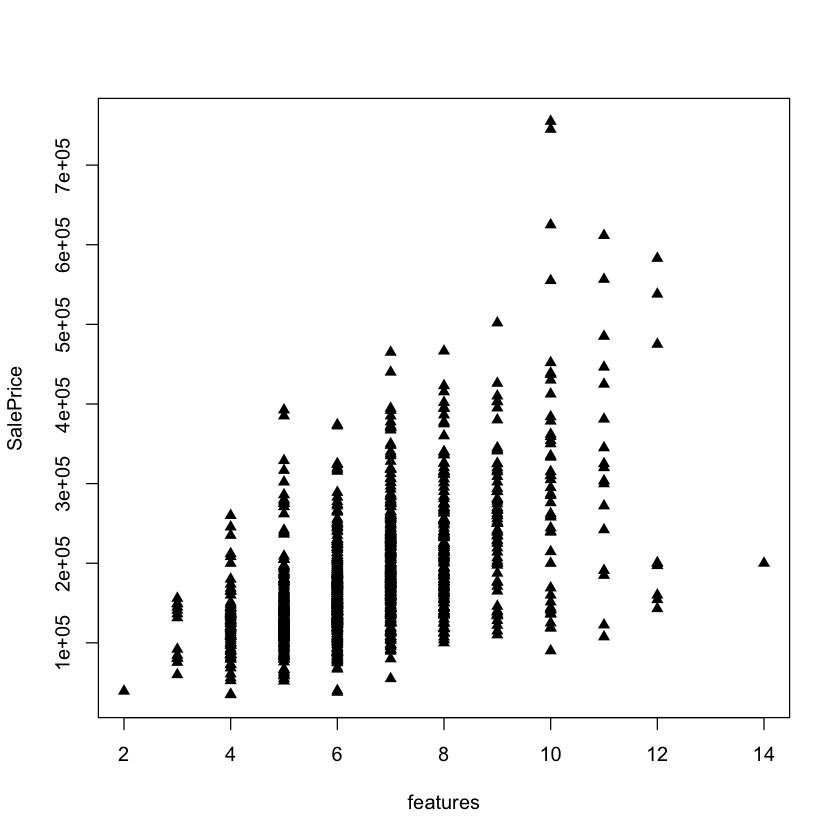

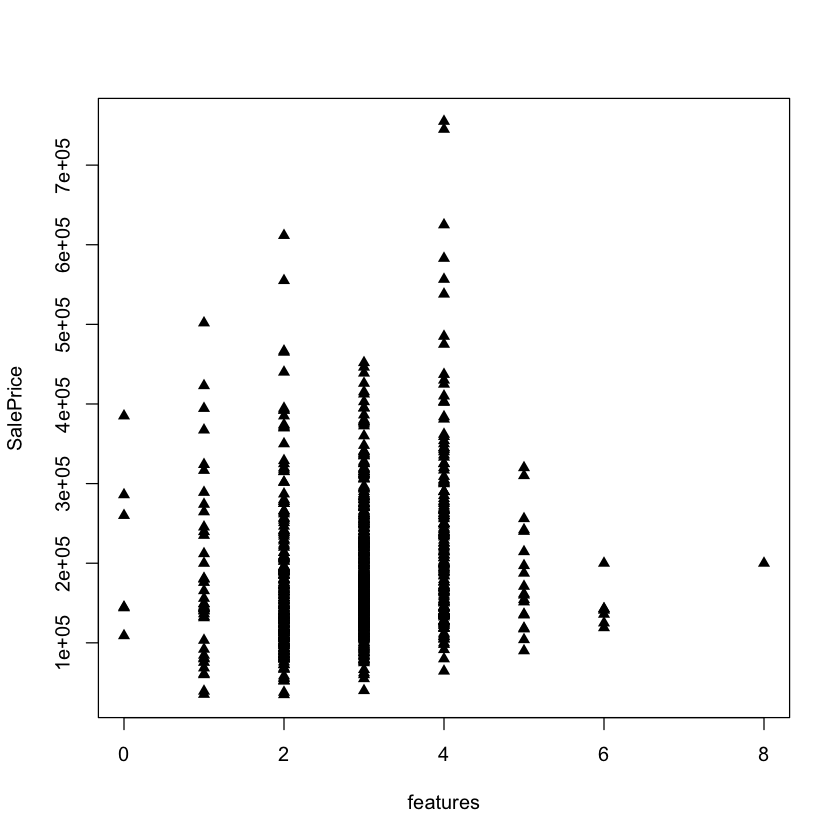

ERROR: Error in abline(model, col = "blue", lwd = 10): object 'model' not found


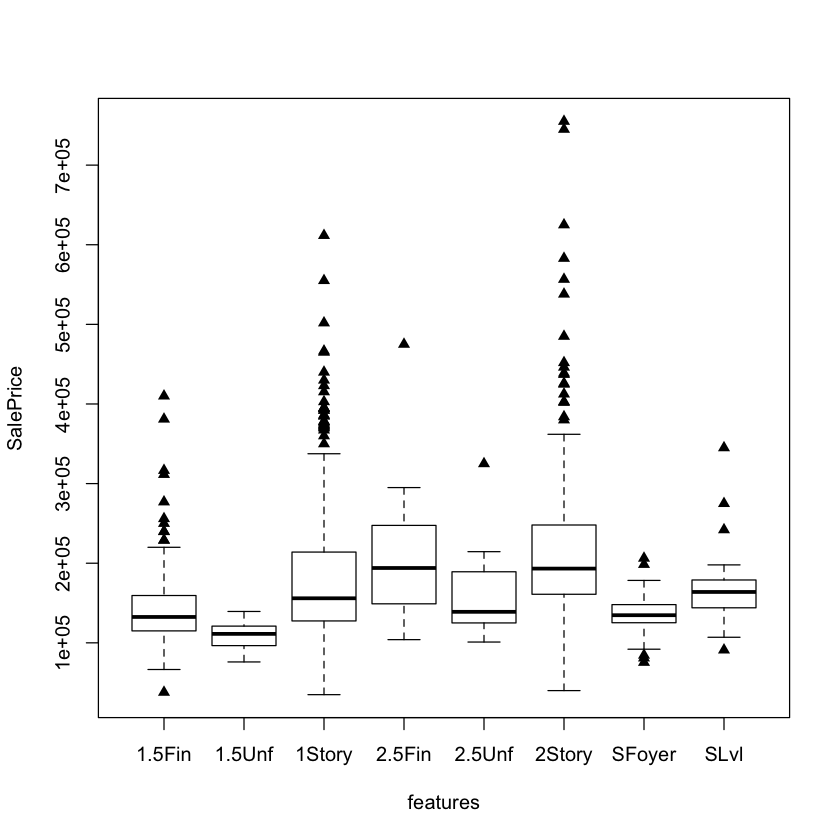

In [385]:
print('Plot data with best fit line')
plot(SalePrice ~.,
     data=training_set2,
     pch=17,
     xlab = "features",
     ylab = "SalePrice")

abline(model,
       col = "blue",
       lwd = 10)

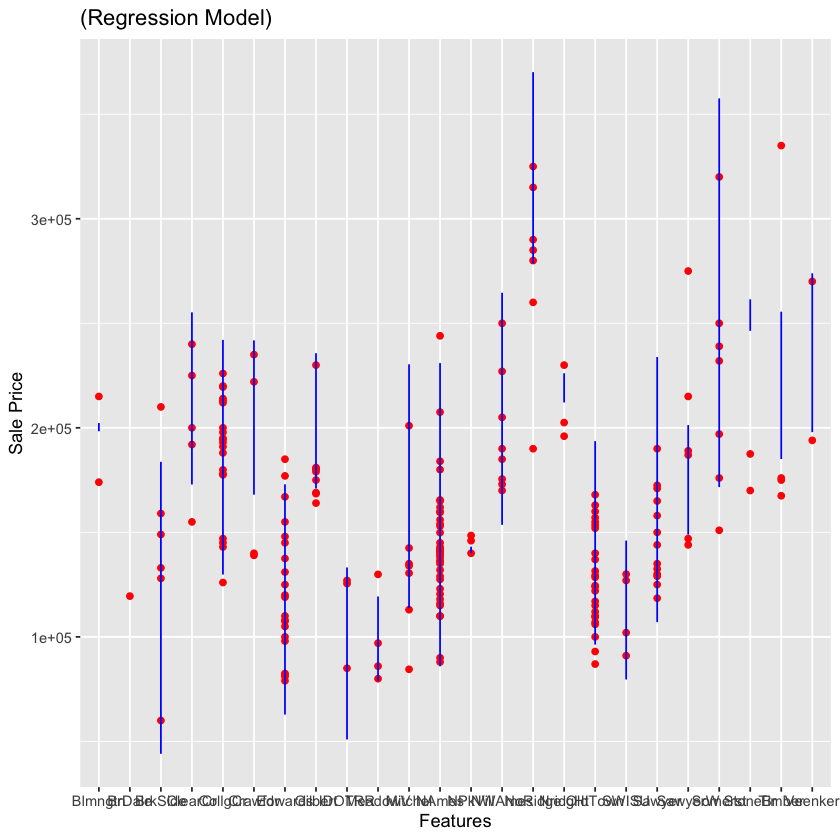

In [319]:
# Visualising the Validation set results

library(ggplot2)
ggplot() +
  geom_point(aes(x = validate_set2$Neighborhood,
                 y = validate_set2$SalePrice),
             colour = 'red') +
  geom_line(aes(x = validate_set2$Neighborhood, y = predict(ml_regessor, newdata = validate_set2)),
            colour = 'blue') +
  ggtitle( '(Regression Model)') +
  xlab('Features') +
  ylab('Sale Price')


## Predicting Actual Test Set

In [301]:
y_pred_ml_TS = predict(ml_regessor, test_set2)

In [302]:
y_pred_ml_TS

1         2         3         4         5         6         7         8 
116164.15 159658.91 157733.52 179529.98 252742.15 177627.70 167155.72 164473.87 
        9        10        11        12        13        14        15        16 
196638.89 112299.74 183504.69  96227.49  87865.41 148140.84 127119.62 381347.42 
       17        18        19        20        21        22        23        24 
256814.44 338101.49 334992.63 421094.08 271596.30 238768.96 182693.24 168057.18 
       25        26        27        28        29        30        31        32 
202235.51 202456.67 358276.17 245573.49 196094.91 236028.37 194298.71 117455.23 
       33        34        35        36        37        38        39        40 
174290.23 328659.99 312243.83 249692.20 199651.40 174035.19 174035.19 163890.93 
       41        42        43        44        45        46        47        48 
183112.14 166972.43 274163.32 228103.34 211292.63 191134.76 221729.38 183803.27 
       49        50        51        52        53        54        55        56 
154950.76 143962.11 138218.26 170442.04 192853.26 146085.98 194852.10 163055.70 
       57        58        59        60        61        62        63        64 
152269.89 166415.63 191008.80 127822.73 131096.64 172070.64 111071.17 118325.91 
       65        66        67        68        69        70        71        72 
115993.61 121952.07 101491.63 128783.81 140986.08 173074.71 131699.32  91221.97 
       73        74        75        76        77        78        79        80 
148965.53 115509.13 133179.96  93280.78  57526.70 157266.26 202024.82 147932.05 
       81        82        83        84        85        86        87        88 
135515.03 152711.30 193083.43 100209.72 126658.79 146595.61 152287.14 153436.19 
       89        90        91        92        93        94        95        96 
132184.48 145999.20 110936.14 159803.23 126625.95 106551.25 194839.30 140995.71 
       97        98        99       100       101       102       103       104 
 90335.83 105587.28 121459.65 155976.67 134798.64 121907.35 113485.07 151677.33 
      105       106       107       108       109       110       111       112 
133992.87 217374.38  88269.42 217967.75 106277.47 133407.60  92558.87 116917.26 
      113       114       115       116       117       118       119       120 
184974.85 137167.78 202425.67 211782.71 197320.25 156337.94 142824.94 196041.25 
      121       122       123       124       125       126       127       128 
136762.70 140130.52 261434.57 227123.27 162342.40  52160.58 100513.70 122826.61 
      129       130       131       132       133       134       135       136 
100728.76 119376.69  82174.70 122612.44 135431.81 153458.31 132387.07 221756.07 
      137       138       139       140       141       142       143       144 
216871.80 232493.96 172596.25 181667.41  40260.87 103444.71  81442.47 276002.22 
      145       146       147       148       149       150       151       152 
225508.72 167257.86 203159.57 213259.98 199941.71 153833.52 153672.46 199699.82 
      153       154       155       156       157       158       159       160 
152118.42 110555.49  65270.99  65270.99  76559.67 112496.10 138292.72 203999.56 
      161       162       163       164       165       166       167       168 
122566.43 135652.06 218478.12 175860.46 123383.44 167369.43 171569.45 261983.86 
      169       170       171       172       173       174       175       176 
206149.95 362036.97 254388.29 278102.28 193025.74 172069.16 178733.32 176951.02 
      177       178       179       180       181       182       183       184 
179265.26 207054.62 177053.06 244915.54 176365.77 243669.55 228577.98 225704.70 
      185       186       187       188       189       190       191       192 
171616.29 153236.93 166825.21 146327.92 124549.21 109142.56 109145.64  96233.65 
      193       194       195       196       197       198       199       200 
 96184.55 150145.28 152593.25 140214.71